### LIBs (R)

In [8]:
# bibliotecas do python
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
import rpy2.robjects.packages as rpackages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from inspect import currentframe
from natsort import natsorted
from prettytable import PrettyTable
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
%%capture
# ***********DEMORA************
# Só rode se nunca tiver rodado esta célula 
# bibliotecas do R
base = importr('base')
utils = importr('utils')
utils.chooseCRANmirror(ind=1)
ts_analysis = ('urca','tseries','forecast','e1071','Metrics')

from rpy2.robjects.vectors import StrVector
utils.install_packages(StrVector(ts_analysis))

In [9]:
# importando as bibliotecas do R usadas para predição

urca = importr('urca')
tseries = importr('tseries')
forecast = importr('forecast')
e1071 = importr('e1071')
metrics = importr('Metrics')
highcharter = importr("highcharter")

In [10]:
# %R - "linha mágica" - retorna valor como objeto python

# %%R - "célula mágica" - nao retorna valor mas consegue passar input e output  

# Arguments
# -i  -  variaveis de input
# -o  -  variaveis de output
# -h  -  altura do plot
# -w  -  largura do plot


%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


## BBR

### Geraçāo de gráficos CE-SP

In [11]:
Ts_Original_CE_SP_bbr = pd.read_csv('datasets vazao/original/bbr/bbr esmond data ce-sp 10-21-2022.csv')
Ts_Original_pred_GRU_CE_SP_bbr = pd.read_csv('./predicoes vazao/original/GRU/bbr/prediction_plot_bbr_CE-SP_GRU.csv')
Ts_Original_pred_LSTM_CE_SP_bbr = pd.read_csv('./predicoes vazao/original/LSTM/bbr/prediction_plot_bbr_CE-SP_LSTM.csv')
Ts_Cleaned_CE_SP_bbr = pd.read_csv('datasets vazao/sem outliers/bbr/sem outliers bbr CE-SP 10-21.csv')
Ts_Cleaned_pred_GRU_CE_SP_bbr = pd.read_csv('./predicoes vazao/cleaned/GRU/bbr/prediction_plot_bbr_CE-SP_GRU.csv')
Ts_Cleaned_pred_LSTM_CE_SP_bbr = pd.read_csv('./predicoes vazao/cleaned/LSTM/bbr/prediction_plot_bbr_CE-SP_LSTM.csv')

In [12]:
%%R -i Ts_Cleaned_pred_GRU_CE_SP_bbr -i Ts_Cleaned_pred_LSTM_CE_SP_bbr -i Ts_Cleaned_CE_SP_bbr -i Ts_Original_CE_SP_bbr -i Ts_Original_pred_GRU_CE_SP_bbr -i Ts_Original_pred_LSTM_CE_SP_bbr
Ts_Original_CE_SP_bbr = ts(Ts_Original_CE_SP_bbr, start = c(1,1), end= c(1,900), frequency = 6)
Ts_Original_pred_GRU_CE_SP_bbr = ts(Ts_Original_pred_GRU_CE_SP_bbr, start = c(106,1), frequency = 6)
Ts_Original_pred_LSTM_CE_SP_bbr = ts(Ts_Original_pred_LSTM_CE_SP_bbr, start = c(106,1), frequency = 6)
Ts_Cleaned_pred_GRU_CE_SP_bbr = ts(Ts_Cleaned_pred_GRU_CE_SP_bbr, start = c(106,1), frequency = 6)
Ts_Cleaned_pred_LSTM_CE_SP_bbr = ts(Ts_Cleaned_pred_LSTM_CE_SP_bbr, start = c(106,1), frequency = 6)
Ts_Cleaned_View_R_CE_SP_bbr = ts(Ts_Cleaned_CE_SP_bbr, start = c(1,1), end= c(1,900), frequency = 6)

In [13]:
%%R # Separar conjuntos de treino

mytsTrain105_Original_CE_SP_bbr = window(Ts_Original_CE_SP_bbr, start = c(1,1), end = c(105,6))
mytsTest106_Original_CE_SP_bbr = window(Ts_Original_CE_SP_bbr, start = c(106,1), end = c(145,6))
mytsNeural105_Original_CE_SP_bbr = nnetar(mytsTrain105_Original_CE_SP_bbr)
prevNeural105_Original_CE_SP_bbr = forecast(mytsNeural105_Original_CE_SP_bbr, h=240)

mytsTrain105_Cleaned_CE_SP_bbr = window(Ts_Cleaned_View_R_CE_SP_bbr, start = c(1,1), end = c(105,6))
mytsTest106_Cleaned_CE_SP_bbr = window(Ts_Cleaned_View_R_CE_SP_bbr, start = c(106,1), end = c(145,6))
mytsNeural105_Cleaned_CE_SP_bbr = nnetar(mytsTrain105_Cleaned_CE_SP_bbr)
prevNeural105_Cleaned_CE_SP_bbr = forecast(mytsNeural105_Cleaned_CE_SP_bbr, h=240)

In [14]:
%%R # salvar predição NNETAR e serie de Teste

dt_prevNeural105_Original_CE_SP_bbr = data.frame(prevNeural105_Original_CE_SP_bbr$mean)
names(dt_prevNeural105_Original_CE_SP_bbr) = NULL
write.csv(dt_prevNeural105_Original_CE_SP_bbr,"./predicoes vazao/original/NNETAR/bbr/prediction_plot_bbr_CE-SP_NNETAR.csv", row.names = FALSE)
dt_Test106_Orginal_CE_SP_bbr = data.frame(mytsTest106_Original_CE_SP_bbr)
names(dt_Test106_Orginal_CE_SP_bbr) = NULL
write.csv(dt_Test106_Orginal_CE_SP_bbr,"./predicoes vazao/series de teste/original/bbr/mytsTest106_plot_bbr_CE-SP.csv", row.names = FALSE)

dt_prevNeural105_Cleaned_CE_SP_bbr = data.frame(prevNeural105_Cleaned_CE_SP_bbr$mean)
names(dt_prevNeural105_Cleaned_CE_SP_bbr) = NULL
write.csv(dt_prevNeural105_Cleaned_CE_SP_bbr,"./predicoes vazao/cleaned/NNETAR/bbr/prediction_plot_bbr_CE-SP_NNETAR.csv", row.names = FALSE)
dt_Test106_Cleaned_CE_SP_bbr = data.frame(mytsTest106_Cleaned_CE_SP_bbr)
names(dt_Test106_Cleaned_CE_SP_bbr) = NULL
write.csv(dt_Test106_Cleaned_CE_SP_bbr,"./predicoes vazao/series de teste/cleaned/bbr/mytsTest106_plot_bbr_CE-SP.csv", row.names = FALSE)

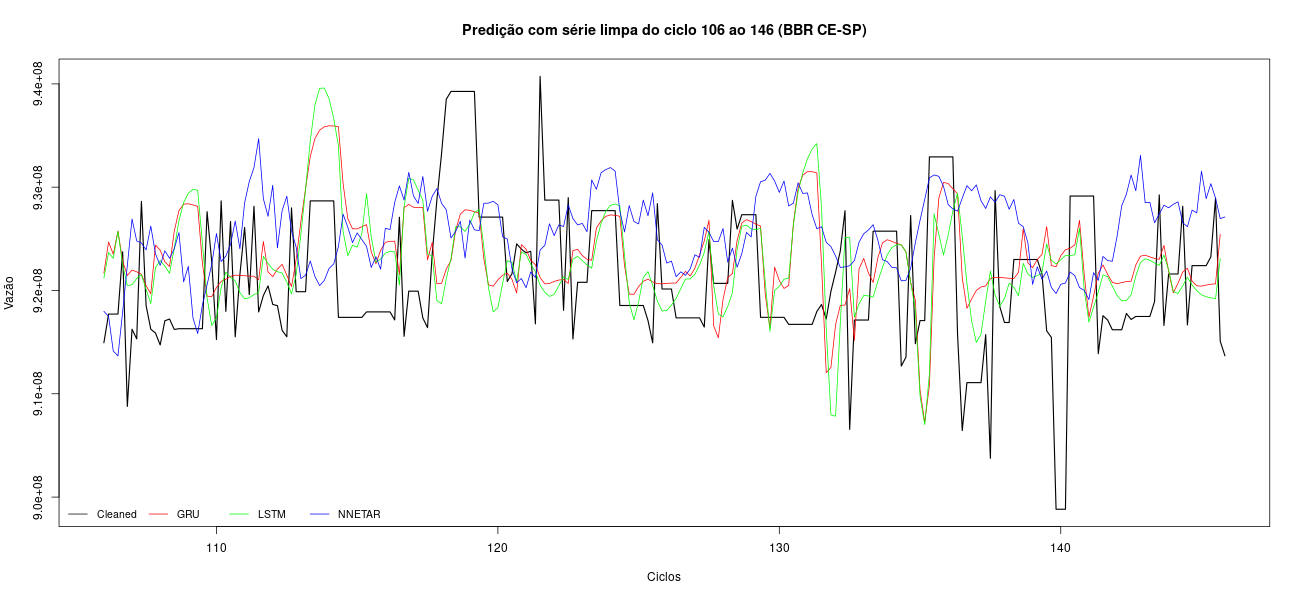

In [15]:
%%R -w 1300 -h 600

minimo = min(c(mytsTest106_Cleaned_CE_SP_bbr, Ts_Cleaned_pred_GRU_CE_SP_bbr, Ts_Cleaned_pred_LSTM_CE_SP_bbr, prevNeural105_Cleaned_CE_SP_bbr$mean)) - 1000
maximo = max(c(mytsTest106_Cleaned_CE_SP_bbr, Ts_Cleaned_pred_GRU_CE_SP_bbr, Ts_Cleaned_pred_LSTM_CE_SP_bbr, prevNeural105_Cleaned_CE_SP_bbr$mean)) + 1000
plot(mytsTest106_Cleaned_CE_SP_bbr, main= "Predição com série limpa do ciclo 106 ao 146 (BBR CE-SP)", xlab="Ciclos", ylab="Vazāo", ylim=c(minimo, maximo), lwd=1.5)
lines(Ts_Cleaned_pred_GRU_CE_SP_bbr, col="red", border="orange")
lines(Ts_Cleaned_pred_LSTM_CE_SP_bbr, col="green")
lines(prevNeural105_Cleaned_CE_SP_bbr$mean, col="blue")
legend("bottomleft", legend = c("Cleaned", "GRU", "LSTM","NNETAR"), 
       col = c("black", "red","green","blue"), lty=1:1, cex=0.87, bty = "n", horiz=T)

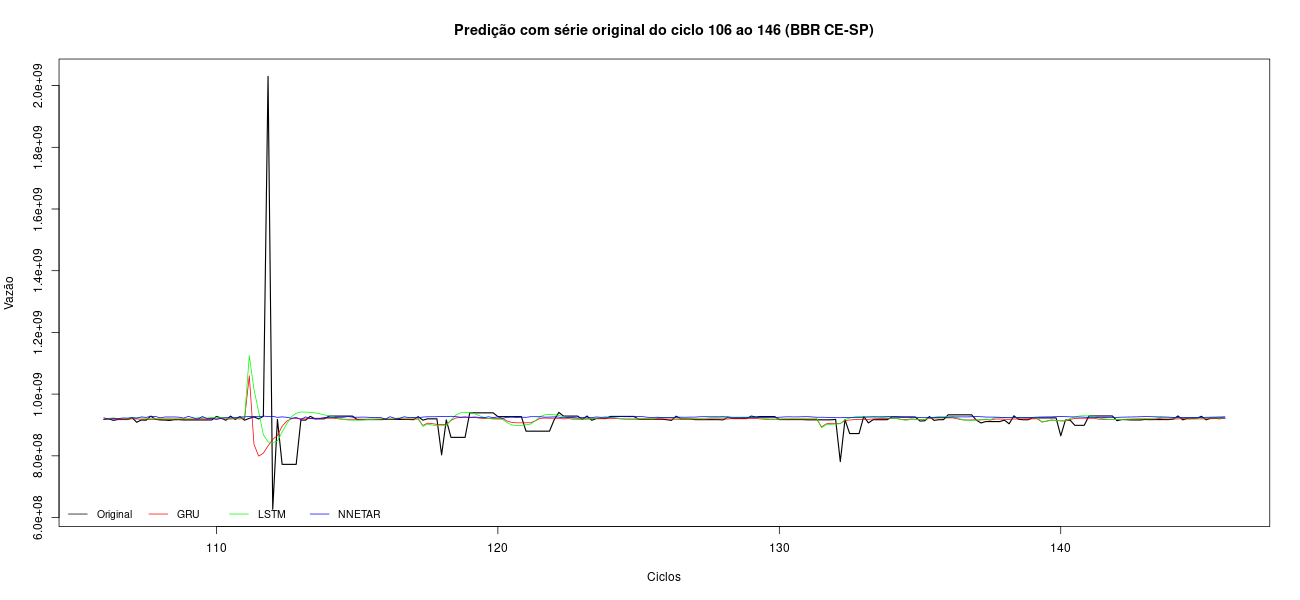

In [16]:
%%R -w 1300 -h 600

minimo = min(c(mytsTest106_Original_CE_SP_bbr, prevNeural105_Original_CE_SP_bbr$mean)) - 1000 # , Ts_Original_pred_GRU_CE_SP_bbr, Ts_Original_pred_LSTM_CE_SP_bbr,
maximo = max(c(mytsTest106_Original_CE_SP_bbr, prevNeural105_Original_CE_SP_bbr$mean)) + 1000 # , Ts_Original_pred_GRU_CE_SP_bbr, Ts_Original_pred_LSTM_CE_SP_bbr, 
plot(mytsTest106_Original_CE_SP_bbr, main= "Predição com série original do ciclo 106 ao 146 (BBR CE-SP)", xlab="Ciclos", ylab="Vazāo", ylim=c(minimo, maximo), lwd=1.5)
lines(Ts_Original_pred_GRU_CE_SP_bbr, col="red", border="orange")
lines(Ts_Original_pred_LSTM_CE_SP_bbr, col="green")
lines(prevNeural105_Original_CE_SP_bbr$mean, col="blue")
legend("bottomleft", legend = c("Original", "GRU", "LSTM","NNETAR"), 
       col = c("black", "red","green","blue"), lty=1:1, cex=0.87, bty = "n", horiz=T)

### Geraçāo de gráficos MG-RS

In [17]:
Ts_Original_MG_RS_bbr = pd.read_csv('datasets vazao/original/bbr/bbr esmond data mg-rs 10-21-2022.csv')
Ts_Original_pred_GRU_MG_RS_bbr = pd.read_csv('./predicoes vazao/original/GRU/bbr/prediction_plot_bbr_MG-RS_GRU.csv')
Ts_Original_pred_LSTM_MG_RS_bbr = pd.read_csv('./predicoes vazao/original/LSTM/bbr/prediction_plot_bbr_MG-RS_LSTM.csv')
Ts_Cleaned_MG_RS_bbr = pd.read_csv('datasets vazao/sem outliers/bbr/sem outliers bbr MG-RS 10-21.csv')
Ts_Cleaned_pred_GRU_MG_RS_bbr = pd.read_csv('./predicoes vazao/cleaned/GRU/bbr/prediction_plot_bbr_MG-RS_GRU.csv')
Ts_Cleaned_pred_LSTM_MG_RS_bbr = pd.read_csv('./predicoes vazao/cleaned/LSTM/bbr/prediction_plot_bbr_MG-RS_LSTM.csv')

In [18]:
%%R -i Ts_Cleaned_pred_GRU_MG_RS_bbr -i Ts_Cleaned_pred_LSTM_MG_RS_bbr -i Ts_Cleaned_MG_RS_bbr -i Ts_Original_MG_RS_bbr -i Ts_Original_pred_GRU_MG_RS_bbr -i Ts_Original_pred_LSTM_MG_RS_bbr

Ts_Original_MG_RS_bbr = ts(Ts_Original_MG_RS_bbr, start = c(1,1), end= c(1,900), frequency = 6)
Ts_Original_pred_GRU_MG_RS_bbr = ts(Ts_Original_pred_GRU_MG_RS_bbr, start = c(106,1), frequency = 6)
Ts_Original_pred_LSTM_MG_RS_bbr = ts(Ts_Original_pred_LSTM_MG_RS_bbr, start = c(106,1), frequency = 6)
Ts_Cleaned_pred_GRU_MG_RS_bbr = ts(Ts_Cleaned_pred_GRU_MG_RS_bbr, start = c(106,1), frequency = 6)
Ts_Cleaned_pred_LSTM_MG_RS_bbr = ts(Ts_Cleaned_pred_LSTM_MG_RS_bbr, start = c(106,1), frequency = 6)
Ts_Cleaned_View_R_MG_RS_bbr = ts(Ts_Cleaned_MG_RS_bbr, start = c(1,1), end= c(1,900), frequency = 6)

In [19]:
%%R # Separar conjuntos de treino

mytsTrain105_Original_MG_RS_bbr = window(Ts_Original_MG_RS_bbr, start = c(1,1), end = c(105,6))
mytsTest106_Original_MG_RS_bbr = window(Ts_Original_MG_RS_bbr, start = c(106,1), end = c(145,6))
mytsNeural105_Original_MG_RS_bbr = nnetar(mytsTrain105_Original_MG_RS_bbr)
prevNeural105_Original_MG_RS_bbr = forecast(mytsNeural105_Original_MG_RS_bbr, h=240)

mytsTrain105_Cleaned_MG_RS_bbr = window(Ts_Cleaned_View_R_MG_RS_bbr, start = c(1,1), end = c(105,6))
mytsTest106_Cleaned_MG_RS_bbr = window(Ts_Cleaned_View_R_MG_RS_bbr, start = c(106,1), end = c(145,6))
mytsNeural105_Cleaned_MG_RS_bbr = nnetar(mytsTrain105_Cleaned_MG_RS_bbr)
prevNeural105_Cleaned_MG_RS_bbr = forecast(mytsNeural105_Cleaned_MG_RS_bbr, h=240)


In [20]:
%%R # salvar predição NNETAR e serie de Teste

dt_prevNeural105_Original_MG_RS_bbr = data.frame(prevNeural105_Original_MG_RS_bbr$mean)
names(dt_prevNeural105_Original_MG_RS_bbr) = NULL
write.csv(dt_prevNeural105_Original_MG_RS_bbr,"./predicoes vazao/original/NNETAR/bbr/prediction_plot_bbr_MG-RS_NNETAR.csv", row.names = FALSE)
dt_Test106_Original_MG_RS_bbr = data.frame(mytsTest106_Original_MG_RS_bbr)
names(dt_Test106_Original_MG_RS_bbr) = NULL
write.csv(dt_Test106_Original_MG_RS_bbr,"./predicoes vazao/series de teste/original/bbr/mytsTest106_plot_bbr_MG-RS.csv", row.names = FALSE)

dt_prevNeural105_Cleaned_MG_RS_bbr = data.frame(prevNeural105_Cleaned_MG_RS_bbr$mean)
names(dt_prevNeural105_Cleaned_MG_RS_bbr) = NULL
write.csv(dt_prevNeural105_Cleaned_MG_RS_bbr,"./predicoes vazao/cleaned/NNETAR/bbr/prediction_plot_bbr_MG-RS_NNETAR.csv", row.names = FALSE)
dt_Test106_Cleaned_MG_RS_bbr = data.frame(mytsTest106_Cleaned_MG_RS_bbr)
names(dt_Test106_Cleaned_MG_RS_bbr) = NULL
write.csv(dt_Test106_Cleaned_MG_RS_bbr,"./predicoes vazao/series de teste/cleaned/bbr/mytsTest106_plot_bbr_MG-RS.csv", row.names = FALSE)

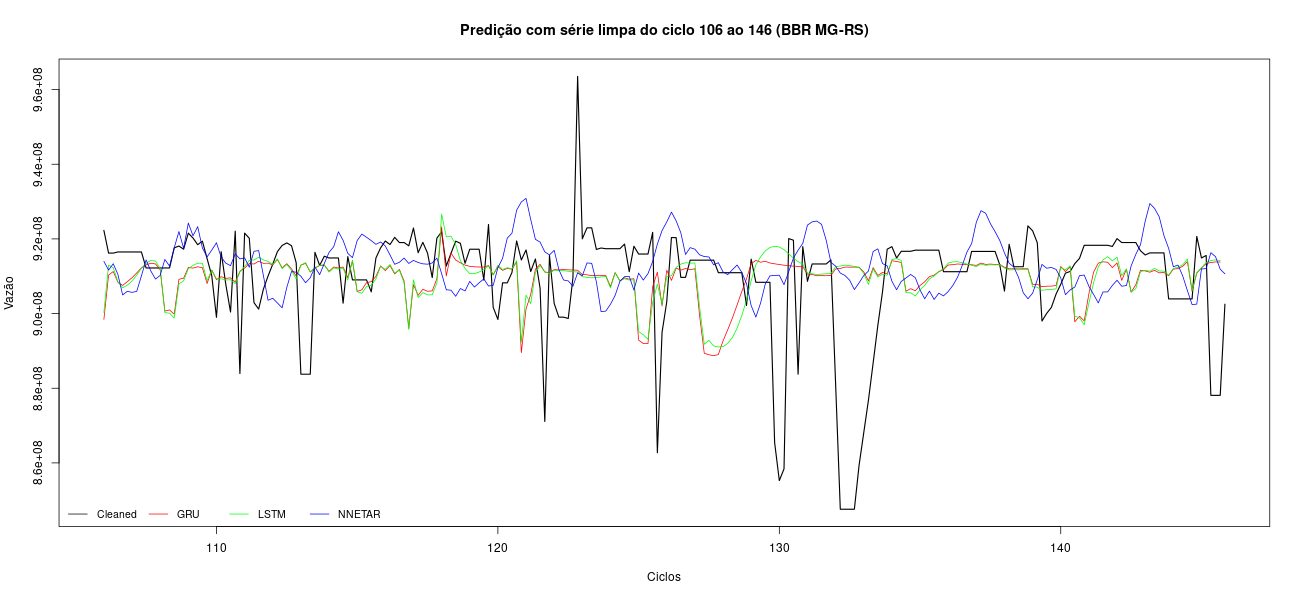

In [21]:
%%R -w 1300 -h 600

minimo = min(c(mytsTest106_Cleaned_MG_RS_bbr, Ts_Cleaned_pred_GRU_MG_RS_bbr, Ts_Cleaned_pred_LSTM_MG_RS_bbr, prevNeural105_Cleaned_MG_RS_bbr$mean)) - 1000
maximo = max(c(mytsTest106_Cleaned_MG_RS_bbr, Ts_Cleaned_pred_GRU_MG_RS_bbr, Ts_Cleaned_pred_LSTM_MG_RS_bbr, prevNeural105_Cleaned_MG_RS_bbr$mean)) + 1000
plot(mytsTest106_Cleaned_MG_RS_bbr, main= "Predição com série limpa do ciclo 106 ao 146 (BBR MG-RS)", xlab="Ciclos", ylab="Vazāo", ylim=c(minimo, maximo), lwd=1.5)
lines(Ts_Cleaned_pred_GRU_MG_RS_bbr, col="red", border="orange")
lines(Ts_Cleaned_pred_LSTM_MG_RS_bbr, col="green")
lines(prevNeural105_Cleaned_MG_RS_bbr$mean, col="blue")
legend("bottomleft", legend = c("Cleaned", "GRU", "LSTM","NNETAR"), 
       col = c("black", "red","green","blue"), lty=1:1, cex=0.87, bty = "n", horiz=T)

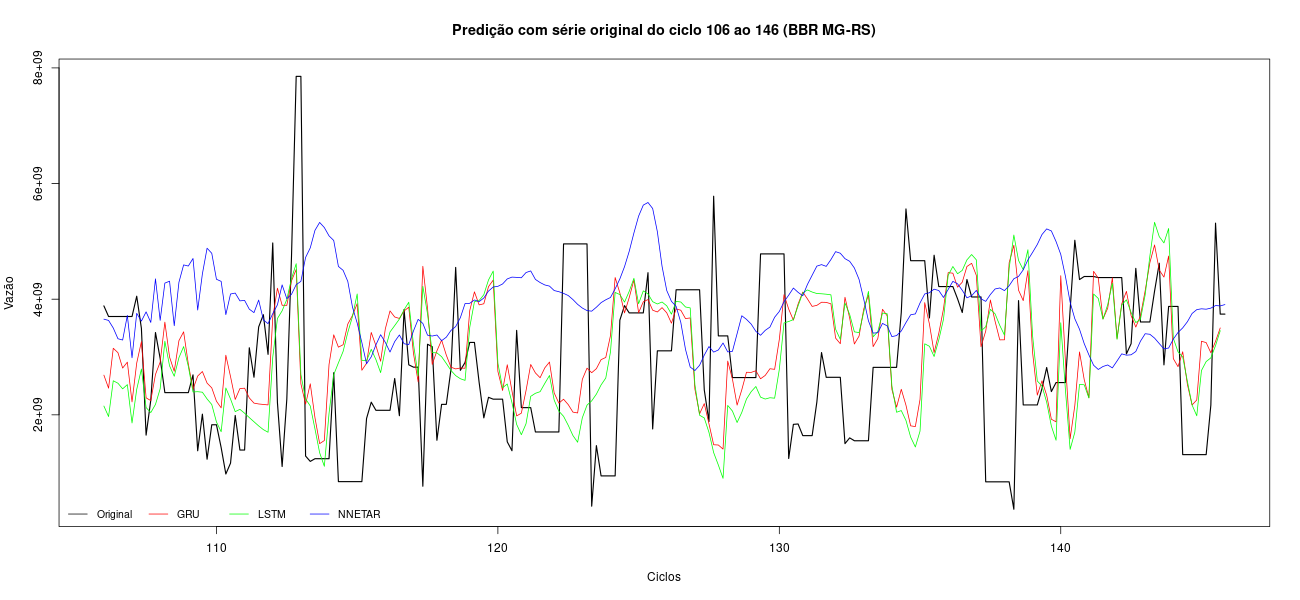

In [22]:
%%R -w 1300 -h 600

minimo = min(c(mytsTest106_Original_MG_RS_bbr, prevNeural105_Original_MG_RS_bbr$mean)) - 1000 # , Ts_Original_pred_GRU_MG_RS_bbr, Ts_Original_pred_LSTM_MG_RS_bbr,
maximo = max(c(mytsTest106_Original_MG_RS_bbr, prevNeural105_Original_MG_RS_bbr$mean)) + 1000 # , Ts_Original_pred_GRU_MG_RS_bbr, Ts_Original_pred_LSTM_MG_RS_bbr, 
plot(mytsTest106_Original_MG_RS_bbr, main= "Predição com série original do ciclo 106 ao 146 (BBR MG-RS)", xlab="Ciclos", ylab="Vazāo", ylim=c(minimo, maximo), lwd=1.5)
lines(Ts_Original_pred_GRU_MG_RS_bbr, col="red", border="orange")
lines(Ts_Original_pred_LSTM_MG_RS_bbr, col="green")
lines(prevNeural105_Original_MG_RS_bbr$mean, col="blue")
legend("bottomleft", legend = c("Original", "GRU", "LSTM","NNETAR"), 
       col = c("black", "red","green","blue"), lty=1:1, cex=0.87, bty = "n", horiz=T)

### Geraçāo de gráficos PA-BA

In [23]:
Ts_Original_PA_BA_bbr = pd.read_csv('datasets vazao/original/bbr/bbr esmond data pa-ba 10-21-2022.csv')
Ts_Original_pred_GRU_PA_BA_bbr = pd.read_csv('./predicoes vazao/original/GRU/bbr/prediction_plot_bbr_PA-BA_GRU.csv')
Ts_Original_pred_LSTM_PA_BA_bbr = pd.read_csv('./predicoes vazao/original/LSTM/bbr/prediction_plot_bbr_PA-BA_LSTM.csv')
Ts_Cleaned_PA_BA_bbr = pd.read_csv('datasets vazao/sem outliers/bbr/sem outliers bbr PA-BA 10-21.csv')
Ts_Cleaned_pred_GRU_PA_BA_bbr = pd.read_csv('./predicoes vazao/cleaned/GRU/bbr/prediction_plot_bbr_PA-BA_GRU.csv')
Ts_Cleaned_pred_LSTM_PA_BA_bbr = pd.read_csv('./predicoes vazao/cleaned/LSTM/bbr/prediction_plot_bbr_PA-BA_LSTM.csv')

In [24]:
%%R -i Ts_Cleaned_pred_GRU_PA_BA_bbr -i Ts_Cleaned_pred_LSTM_PA_BA_bbr -i Ts_Cleaned_PA_BA_bbr -i Ts_Original_PA_BA_bbr -i Ts_Original_pred_GRU_PA_BA_bbr -i Ts_Original_pred_LSTM_PA_BA_bbr

Ts_Original_PA_BA_bbr = ts(Ts_Original_PA_BA_bbr, start = c(1,1), end= c(1,900), frequency = 6)
Ts_Original_pred_GRU_PA_BA_bbr = ts(Ts_Original_pred_GRU_PA_BA_bbr, start = c(106,1), frequency = 6)
Ts_Original_pred_LSTM_PA_BA_bbr = ts(Ts_Original_pred_LSTM_PA_BA_bbr, start = c(106,1), frequency = 6)
Ts_Cleaned_pred_GRU_PA_BA_bbr = ts(Ts_Cleaned_pred_GRU_PA_BA_bbr, start = c(106,1), frequency = 6)
Ts_Cleaned_pred_LSTM_PA_BA_bbr = ts(Ts_Cleaned_pred_LSTM_PA_BA_bbr, start = c(106,1), frequency = 6)
Ts_Cleaned_View_R_PA_BA_bbr = ts(Ts_Cleaned_PA_BA_bbr, start = c(1,1), end= c(1,900), frequency = 6)

In [25]:
%%R # Separar conjuntos de treino

mytsTrain105_Original_PA_BA_bbr = window(Ts_Original_PA_BA_bbr, start = c(1,1), end = c(105,6))
mytsTest106_Original_PA_BA_bbr = window(Ts_Original_PA_BA_bbr, start = c(106,1), end = c(145,6))
mytsNeural105_Original_PA_BA_bbr = nnetar(mytsTrain105_Original_PA_BA_bbr)
prevNeural105_Original_PA_BA_bbr = forecast(mytsNeural105_Original_PA_BA_bbr, h=240)

mytsTrain105_Cleaned_PA_BA_bbr = window(Ts_Cleaned_View_R_PA_BA_bbr, start = c(1,1), end = c(105,6))
mytsTest106_Cleaned_PA_BA_bbr = window(Ts_Cleaned_View_R_PA_BA_bbr, start = c(106,1), end = c(145,6))
mytsNeural105_Cleaned_PA_BA_bbr = nnetar(mytsTrain105_Cleaned_PA_BA_bbr)
prevNeural105_Cleaned_PA_BA_bbr = forecast(mytsNeural105_Cleaned_PA_BA_bbr, h=240)

In [26]:
%%R # salvar predição NNETAR e serie de Teste

dt_prevNeural105_Original_PA_BA_bbr = data.frame(prevNeural105_Original_PA_BA_bbr$mean)
names(dt_prevNeural105_Original_PA_BA_bbr) = NULL
write.csv(dt_prevNeural105_Original_PA_BA_bbr,"./predicoes vazao/original/NNETAR/bbr/prediction_plot_bbr_PA-BA_NNETAR.csv", row.names = FALSE)
dt_Test106_Original_PA_BA_bbr = data.frame(mytsTest106_Original_PA_BA_bbr)
names(dt_Test106_Original_PA_BA_bbr) = NULL
write.csv(dt_Test106_Original_PA_BA_bbr,"./predicoes vazao/series de teste/original/bbr/mytsTest106_plot_bbr_PA-BA.csv", row.names = FALSE)

dt_prevNeural105_Cleaned_PA_BA_bbr = data.frame(prevNeural105_Cleaned_PA_BA_bbr$mean)
names(dt_prevNeural105_Cleaned_PA_BA_bbr) = NULL
write.csv(dt_prevNeural105_Cleaned_PA_BA_bbr,"./predicoes vazao/cleaned/NNETAR/bbr/prediction_plot_bbr_PA-BA_NNETAR.csv", row.names = FALSE)
dt_Test106_Cleaned_PA_BA_bbr = data.frame(mytsTest106_Cleaned_PA_BA_bbr)
names(dt_Test106_Cleaned_PA_BA_bbr) = NULL
write.csv(dt_Test106_Cleaned_PA_BA_bbr,"./predicoes vazao/series de teste/cleaned/bbr/mytsTest106_plot_bbr_PA-BA.csv", row.names = FALSE)

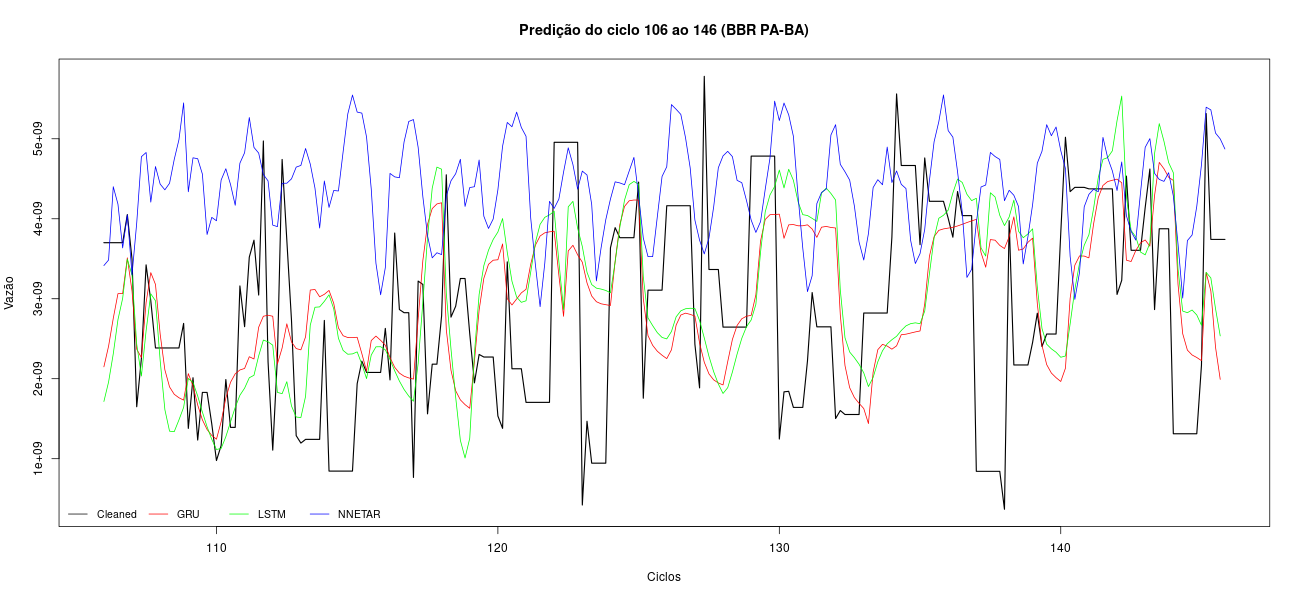

In [27]:
%%R -w 1300 -h 600

minimo = min(c(mytsTest106_Cleaned_PA_BA_bbr, Ts_Cleaned_pred_GRU_PA_BA_bbr, Ts_Cleaned_pred_LSTM_PA_BA_bbr, prevNeural105_Cleaned_PA_BA_bbr$mean)) - 1000
maximo = max(c(mytsTest106_Cleaned_PA_BA_bbr, Ts_Cleaned_pred_GRU_PA_BA_bbr, Ts_Cleaned_pred_LSTM_PA_BA_bbr, prevNeural105_Cleaned_PA_BA_bbr$mean)) + 1000
plot(mytsTest106_Cleaned_PA_BA_bbr, main= "Predição do ciclo 106 ao 146 (BBR PA-BA)", xlab="Ciclos", ylab="Vazāo", ylim=c(minimo, maximo), lwd=1.5)
lines(Ts_Cleaned_pred_GRU_PA_BA_bbr, col="red", border="orange")
lines(Ts_Cleaned_pred_LSTM_PA_BA_bbr, col="green")
lines(prevNeural105_Cleaned_PA_BA_bbr$mean, col="blue")
legend("bottomleft", legend = c("Cleaned", "GRU", "LSTM","NNETAR"), 
       col = c("black", "red","green","blue"), lty=1:1, cex=0.87, bty = "n", horiz=T)

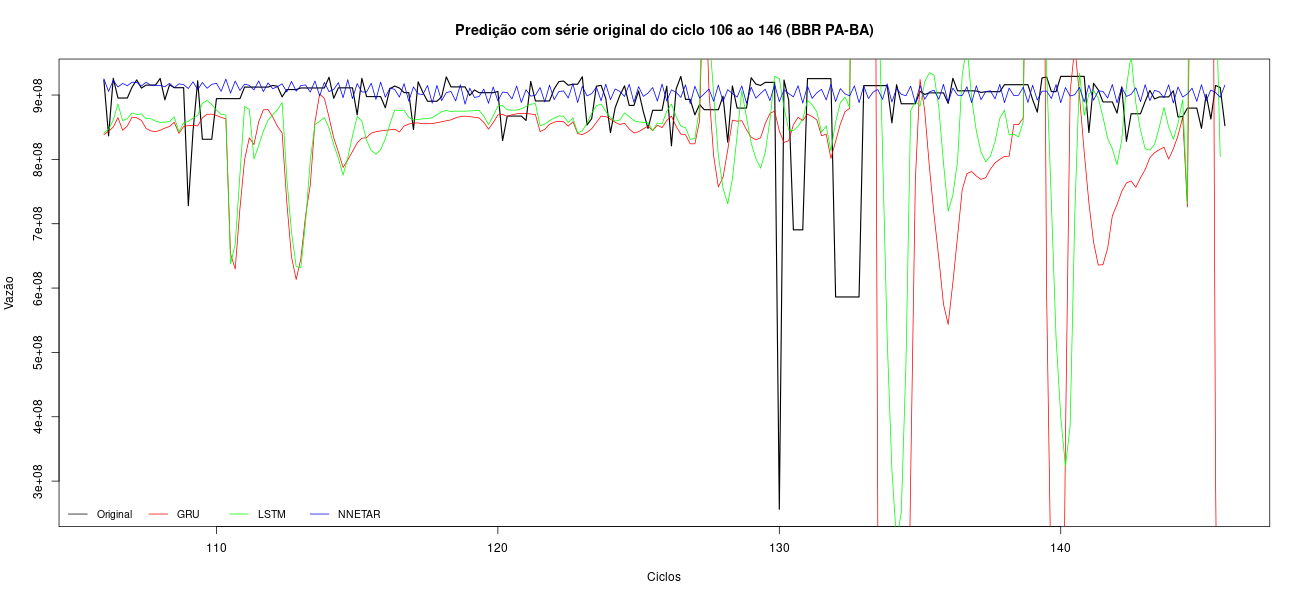

In [28]:
%%R -w 1300 -h 600

minimo = min(c(mytsTest106_Original_PA_BA_bbr, prevNeural105_Original_PA_BA_bbr$mean)) - 1000 # , Ts_Original_pred_GRU_PA_BA_bbr, Ts_Original_pred_LSTM_PA_BA_bbr,
maximo = max(c(mytsTest106_Original_PA_BA_bbr, prevNeural105_Original_PA_BA_bbr$mean)) + 1000 # , Ts_Original_pred_GRU_PA_BA_bbr, Ts_Original_pred_LSTM_PA_BA_bbr, 
plot(mytsTest106_Original_PA_BA_bbr, main= "Predição com série original do ciclo 106 ao 146 (BBR PA-BA)", xlab="Ciclos", ylab="Vazāo", ylim=c(minimo, maximo), lwd=1.5)
lines(Ts_Original_pred_GRU_PA_BA_bbr, col="red", border="orange")
lines(Ts_Original_pred_LSTM_PA_BA_bbr, col="green")
lines(prevNeural105_Original_PA_BA_bbr$mean, col="blue")
legend("bottomleft", legend = c("Original", "GRU", "LSTM","NNETAR"), 
       col = c("black", "red","green","blue"), lty=1:1, cex=0.87, bty = "n", horiz=T)

### Geraçāo de gráficos PR-AM

In [29]:
Ts_Original_PR_AM_bbr = pd.read_csv('datasets vazao/original/bbr/bbr esmond data pr-am 10-21-2022.csv')
Ts_Cleaned_PR_AM_bbr = pd.read_csv('datasets vazao/sem outliers/bbr/sem outliers bbr PR-AM 10-21.csv')
Ts_Original_pred_GRU_PR_AM_bbr = pd.read_csv('./predicoes vazao/original/GRU/bbr/prediction_plot_bbr_PR-AM_GRU.csv')
Ts_Original_pred_LSTM_PR_AM_bbr = pd.read_csv('./predicoes vazao/original/LSTM/bbr/prediction_plot_bbr_PR-AM_LSTM.csv')
Ts_Cleaned_pred_GRU_PR_AM_bbr = pd.read_csv('./predicoes vazao/cleaned/GRU/bbr/prediction_plot_bbr_PR-AM_GRU.csv')
Ts_Cleaned_pred_LSTM_PR_AM_bbr = pd.read_csv('./predicoes vazao/cleaned/LSTM/bbr/prediction_plot_bbr_PR-AM_LSTM.csv')

In [30]:
%%R -i Ts_Cleaned_pred_GRU_PR_AM_bbr -i Ts_Cleaned_pred_LSTM_PR_AM_bbr -i Ts_Cleaned_PR_AM_bbr -i Ts_Original_PR_AM_bbr -i Ts_Original_pred_GRU_PR_AM_bbr -i Ts_Original_pred_LSTM_PR_AM_bbr

Ts_Original_PR_AM_bbr = ts(Ts_Original_PR_AM_bbr, start = c(1,1), end= c(1,900), frequency = 6)
Ts_Original_pred_GRU_PR_AM_bbr = ts(Ts_Original_pred_GRU_PR_AM_bbr, start = c(106,1), frequency = 6)
Ts_Original_pred_LSTM_PR_AM_bbr = ts(Ts_Original_pred_LSTM_PR_AM_bbr, start = c(106,1), frequency = 6)
Ts_Cleaned_pred_GRU_PR_AM_bbr = ts(Ts_Cleaned_pred_GRU_PR_AM_bbr, start = c(106,1), frequency = 6)
Ts_Cleaned_pred_LSTM_PR_AM_bbr = ts(Ts_Cleaned_pred_LSTM_PR_AM_bbr, start = c(106,1), frequency = 6)
Ts_Cleaned_View_R_PR_AM_bbr = ts(Ts_Cleaned_PR_AM_bbr, start = c(1,1), end= c(1,900), frequency = 6)

In [31]:
%%R # Separar conjuntos de treino

mytsTrain105_Original_PR_AM_bbr = window(Ts_Original_PR_AM_bbr, start = c(1,1), end = c(105,6))
mytsTest106_Original_PR_AM_bbr = window(Ts_Original_PR_AM_bbr, start = c(106,1), end = c(145,6))
mytsNeural105_Original_PR_AM_bbr = nnetar(mytsTrain105_Original_PR_AM_bbr)
prevNeural105_Original_PR_AM_bbr = forecast(mytsNeural105_Original_PR_AM_bbr, h=240)

mytsTrain105_Cleaned_PR_AM_bbr = window(Ts_Cleaned_View_R_PR_AM_bbr, start = c(1,1), end = c(105,6))
mytsTest106_Cleaned_PR_AM_bbr = window(Ts_Cleaned_View_R_PR_AM_bbr, start = c(106,1), end = c(145,6))
mytsNeural105_Cleaned_PR_AM_bbr = nnetar(mytsTrain105_Cleaned_PR_AM_bbr)
prevNeural105_Cleaned_PR_AM_bbr = forecast(mytsNeural105_Cleaned_PR_AM_bbr, h=240)


In [32]:
%%R # salvar predição NNETAR e serie de Teste

dt_prevNeural105_Original_PR_AM_bbr = data.frame(prevNeural105_Original_PR_AM_bbr$mean)
names(dt_prevNeural105_Original_PR_AM_bbr) = NULL
write.csv(dt_prevNeural105_Original_PR_AM_bbr,"./predicoes vazao/original/NNETAR/bbr/prediction_plot_bbr_PR-AM_NNETAR.csv", row.names = FALSE)
dt_Test106_Original_PR_AM_bbr = data.frame(mytsTest106_Original_PR_AM_bbr)
names(dt_Test106_Original_PR_AM_bbr) = NULL
write.csv(dt_Test106_Original_PR_AM_bbr,"./predicoes vazao/series de teste/original/bbr/mytsTest106_plot_bbr_PR-AM.csv", row.names = FALSE)

dt_prevNeural105_Cleaned_PR_AM_bbr = data.frame(prevNeural105_Cleaned_PR_AM_bbr$mean)
names(dt_prevNeural105_Cleaned_PR_AM_bbr) = NULL
write.csv(dt_prevNeural105_Cleaned_PR_AM_bbr,"./predicoes vazao/cleaned/NNETAR/bbr/prediction_plot_bbr_PR-AM_NNETAR.csv", row.names = FALSE)
dt_Test106_Cleaned_PR_AM_bbr = data.frame(mytsTest106_Cleaned_PR_AM_bbr)
names(dt_Test106_Cleaned_PR_AM_bbr) = NULL
write.csv(dt_Test106_Cleaned_PR_AM_bbr,"./predicoes vazao/series de teste/cleaned/bbr/mytsTest106_plot_bbr_PR-AM.csv", row.names = FALSE)

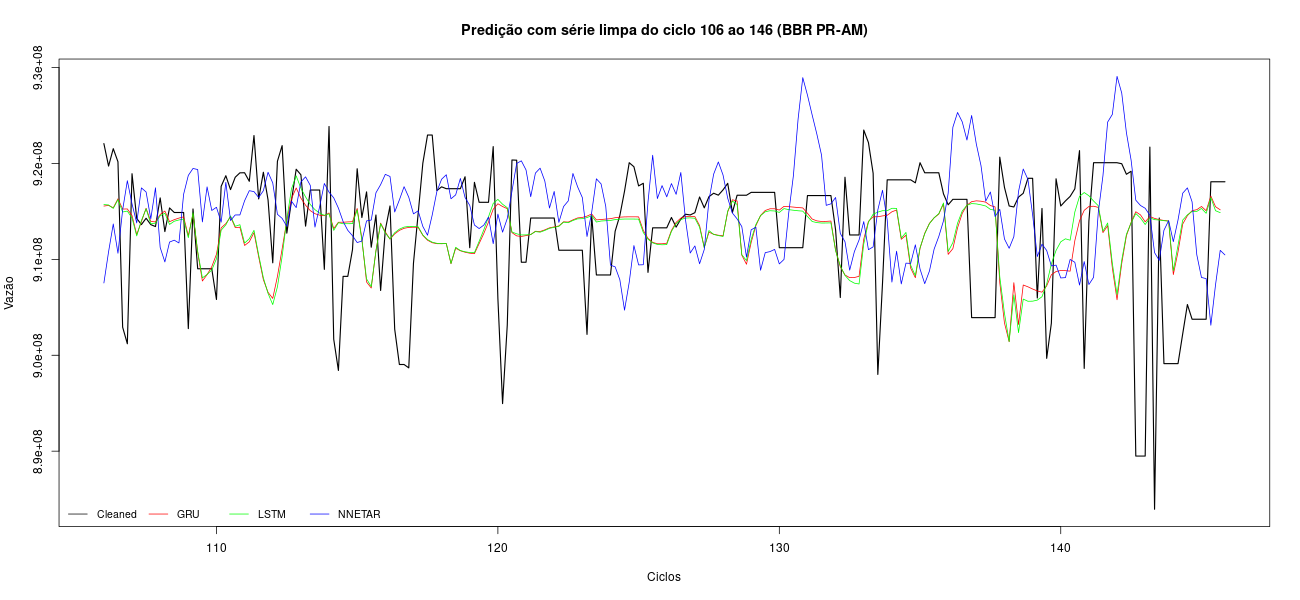

In [33]:
%%R -w 1300 -h 600

minimo = min(c(mytsTest106_Cleaned_PR_AM_bbr, Ts_Cleaned_pred_GRU_PR_AM_bbr, Ts_Cleaned_pred_LSTM_PR_AM_bbr, prevNeural105_Cleaned_PR_AM_bbr$mean)) - 1000
maximo = max(c(mytsTest106_Cleaned_PR_AM_bbr, Ts_Cleaned_pred_GRU_PR_AM_bbr, Ts_Cleaned_pred_LSTM_PR_AM_bbr, prevNeural105_Cleaned_PR_AM_bbr$mean)) + 1000
plot(mytsTest106_Cleaned_PR_AM_bbr, main= "Predição com série limpa do ciclo 106 ao 146 (BBR PR-AM)", xlab="Ciclos", ylab="Vazāo", ylim=c(minimo, maximo), lwd=1.5)
lines(Ts_Cleaned_pred_GRU_PR_AM_bbr, col="red", border="orange")
lines(Ts_Cleaned_pred_LSTM_PR_AM_bbr, col="green")
lines(prevNeural105_Cleaned_PR_AM_bbr$mean, col="blue")
legend("bottomleft", legend = c("Cleaned", "GRU", "LSTM","NNETAR"), 
       col = c("black", "red","green","blue"), lty=1:1, cex=0.87, bty = "n", horiz=T)

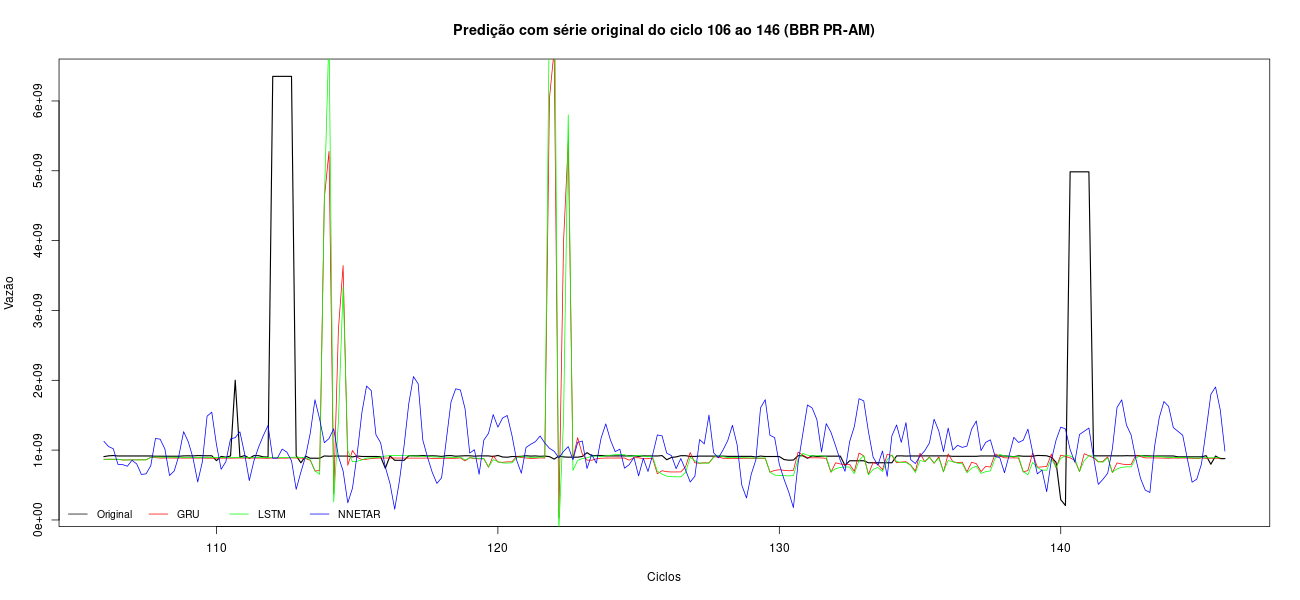

In [34]:
%%R -w 1300 -h 600

minimo = min(c(mytsTest106_Original_PR_AM_bbr, prevNeural105_Original_PR_AM_bbr$mean)) - 1000 # , Ts_Original_pred_GRU_PR_AM_bbr, Ts_Original_pred_LSTM_PR_AM_bbr,
maximo = max(c(mytsTest106_Original_PR_AM_bbr, prevNeural105_Original_PR_AM_bbr$mean)) + 1000 # , Ts_Original_pred_GRU_PR_AM_bbr, Ts_Original_pred_LSTM_PR_AM_bbr, 
plot(mytsTest106_Original_PR_AM_bbr, main= "Predição com série original do ciclo 106 ao 146 (BBR PR-AM)", xlab="Ciclos", ylab="Vazāo", ylim=c(minimo, maximo), lwd=1.5)
lines(Ts_Original_pred_GRU_PR_AM_bbr, col="red", border="orange")
lines(Ts_Original_pred_LSTM_PR_AM_bbr, col="green")
lines(prevNeural105_Original_PR_AM_bbr$mean, col="blue")
legend("bottomleft", legend = c("Original", "GRU", "LSTM","NNETAR"), 
       col = c("black", "red","green","blue"), lty=1:1, cex=0.87, bty = "n", horiz=T)

## Cubic

### Geraçāo de gráficos CE-SP

In [35]:
Ts_Original_CE_SP_cubic = pd.read_csv('datasets vazao/original/cubic/cubic esmond data ce-sp 10-21-2022.csv')
Ts_Original_pred_GRU_CE_SP_cubic = pd.read_csv('./predicoes vazao/original/GRU/cubic/prediction_plot_cubic_CE-SP_GRU.csv')
Ts_Original_pred_LSTM_CE_SP_cubic = pd.read_csv('./predicoes vazao/original/LSTM/cubic/prediction_plot_cubic_CE-SP_LSTM.csv')
Ts_Cleaned_CE_SP_cubic = pd.read_csv('datasets vazao/sem outliers/cubic/sem outliers cubic CE-SP 10-21.csv')
Ts_Cleaned_pred_GRU_CE_SP_cubic = pd.read_csv('./predicoes vazao/cleaned/GRU/cubic/prediction_plot_cubic_CE-SP_GRU.csv')
Ts_Cleaned_pred_LSTM_CE_SP_cubic = pd.read_csv('./predicoes vazao/cleaned/LSTM/cubic/prediction_plot_cubic_CE-SP_LSTM.csv')

In [36]:
%%R -i Ts_Cleaned_pred_GRU_CE_SP_cubic -i Ts_Cleaned_pred_LSTM_CE_SP_cubic -i Ts_Cleaned_CE_SP_cubic -i Ts_Original_CE_SP_cubic -i Ts_Original_pred_GRU_CE_SP_cubic -i Ts_Original_pred_LSTM_CE_SP_cubic

Ts_Original_CE_SP_cubic = ts(Ts_Original_CE_SP_cubic, start = c(1,1), end= c(1,900), frequency = 6)
Ts_Original_pred_GRU_CE_SP_cubic = ts(Ts_Original_pred_GRU_CE_SP_cubic, start = c(106,1), frequency = 6)
Ts_Original_pred_LSTM_CE_SP_cubic = ts(Ts_Original_pred_LSTM_CE_SP_cubic, start = c(106,1), frequency = 6)
Ts_Cleaned_pred_GRU_CE_SP_cubic = ts(Ts_Cleaned_pred_GRU_CE_SP_cubic, start = c(106,1), frequency = 6)
Ts_Cleaned_pred_LSTM_CE_SP_cubic = ts(Ts_Cleaned_pred_LSTM_CE_SP_cubic, start = c(106,1), frequency = 6)
Ts_Cleaned_View_R_CE_SP_cubic = ts(Ts_Cleaned_CE_SP_cubic, start = c(1,1), end= c(1,900), frequency = 6)

In [37]:
%%R # Separar conjuntos de treino

mytsTrain105_Original_CE_SP_cubic = window(Ts_Original_CE_SP_cubic, start = c(1,1), end = c(105,6))
mytsTest106_Original_CE_SP_cubic = window(Ts_Original_CE_SP_cubic, start = c(106,1), end = c(145,6))
mytsNeural105_Original_CE_SP_cubic = nnetar(mytsTrain105_Original_CE_SP_cubic)
prevNeural105_Original_CE_SP_cubic = forecast(mytsNeural105_Original_CE_SP_cubic, h=240)

mytsTrain105_Cleaned_CE_SP_cubic = window(Ts_Cleaned_View_R_CE_SP_cubic, start = c(1,1), end = c(105,6))
mytsTest106_Cleaned_CE_SP_cubic = window(Ts_Cleaned_View_R_CE_SP_cubic, start = c(106,1), end = c(145,6))
mytsNeural105_Cleaned_CE_SP_cubic = nnetar(mytsTrain105_Cleaned_CE_SP_cubic)
prevNeural105_Cleaned_CE_SP_cubic = forecast(mytsNeural105_Cleaned_CE_SP_cubic, h=240)


In [38]:
%%R # salvar predição NNETAR e serie de Teste

dt_prevNeural105_Original_CE_SP_cubic = data.frame(prevNeural105_Original_CE_SP_cubic$mean)
names(dt_prevNeural105_Original_CE_SP_cubic) = NULL
write.csv(dt_prevNeural105_Original_CE_SP_cubic,"./predicoes vazao/original/NNETAR/cubic/prediction_plot_cubic_CE-SP_NNETAR.csv", row.names = FALSE)
dt_Test106_Original_CE_SP_cubic = data.frame(mytsTest106_Original_CE_SP_cubic)
names(dt_Test106_Original_CE_SP_cubic) = NULL
write.csv(dt_Test106_Original_CE_SP_cubic,"./predicoes vazao/series de teste/original/cubic/mytsTest106_plot_cubic_CE-SP.csv", row.names = FALSE)

dt_prevNeural105_Cleaned_CE_SP_cubic = data.frame(prevNeural105_Cleaned_CE_SP_cubic$mean)
names(dt_prevNeural105_Cleaned_CE_SP_cubic) = NULL
write.csv(dt_prevNeural105_Cleaned_CE_SP_cubic,"./predicoes vazao/cleaned/NNETAR/cubic/prediction_plot_cubic_CE-SP_NNETAR.csv", row.names = FALSE)
dt_Test106_Cleaned_CE_SP_cubic = data.frame(mytsTest106_Cleaned_CE_SP_cubic)
names(dt_Test106_Cleaned_CE_SP_cubic) = NULL
write.csv(dt_Test106_Cleaned_CE_SP_cubic,"./predicoes vazao/series de teste/cleaned/cubic/mytsTest106_plot_cubic_CE-SP.csv", row.names = FALSE)

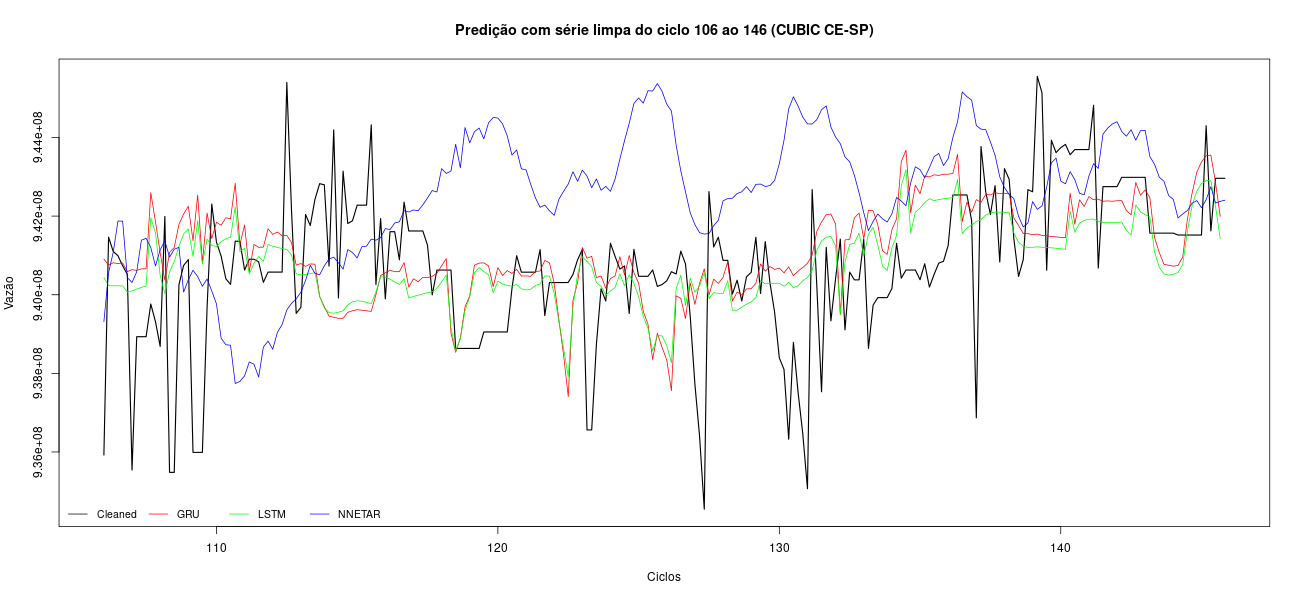

In [39]:
%%R -w 1300 -h 600

minimo = min(c(mytsTest106_Cleaned_CE_SP_cubic, Ts_Cleaned_pred_GRU_CE_SP_cubic, Ts_Cleaned_pred_LSTM_CE_SP_cubic, prevNeural105_Cleaned_CE_SP_cubic$mean)) - 1000
maximo = max(c(mytsTest106_Cleaned_CE_SP_cubic, Ts_Cleaned_pred_GRU_CE_SP_cubic, Ts_Cleaned_pred_LSTM_CE_SP_cubic, prevNeural105_Cleaned_CE_SP_cubic$mean)) + 1000
plot(mytsTest106_Cleaned_CE_SP_cubic, main= "Predição com série limpa do ciclo 106 ao 146 (CUBIC CE-SP)", xlab="Ciclos", ylab="Vazāo", ylim=c(minimo, maximo), lwd=1.5)
lines(Ts_Cleaned_pred_GRU_CE_SP_cubic, col="red", border="orange")
lines(Ts_Cleaned_pred_LSTM_CE_SP_cubic, col="green")
lines(prevNeural105_Cleaned_CE_SP_cubic$mean, col="blue")
legend("bottomleft", legend = c("Cleaned", "GRU", "LSTM","NNETAR"), 
       col = c("black", "red","green","blue"), lty=1:1, cex=0.87, bty = "n", horiz=T)

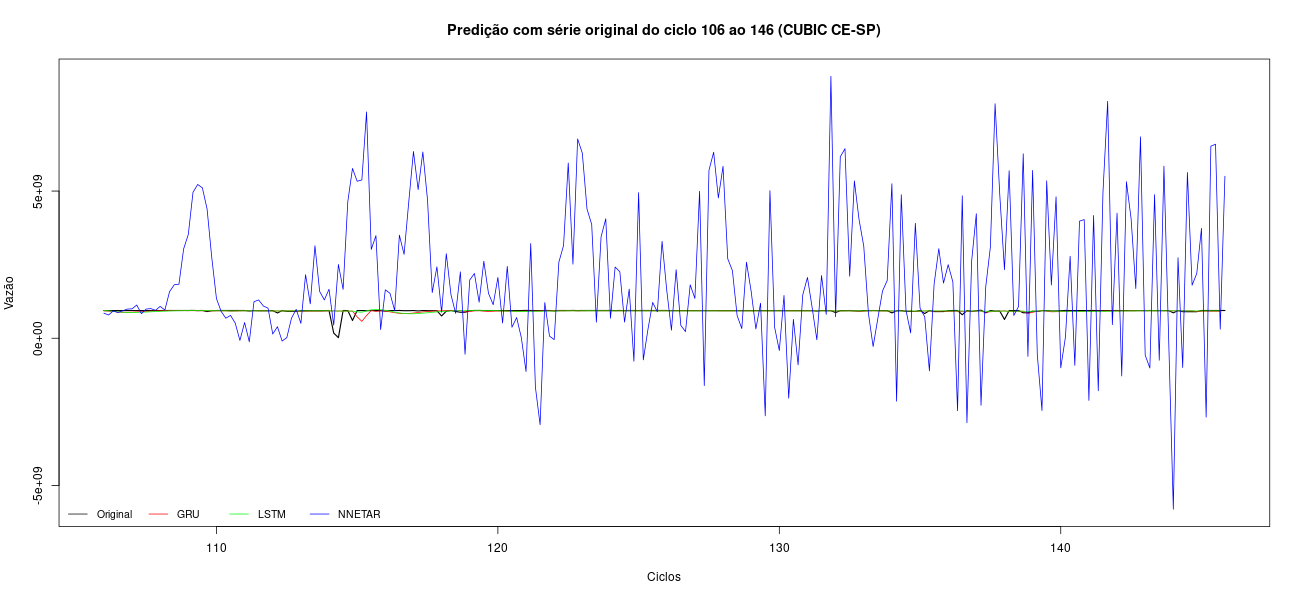

In [40]:
%%R -w 1300 -h 600

minimo = min(c(mytsTest106_Original_CE_SP_cubic, prevNeural105_Original_CE_SP_cubic$mean)) - 1000 # , Ts_Original_pred_GRU_CE_SP_cubic, Ts_Original_pred_LSTM_CE_SP_cubic,
maximo = max(c(mytsTest106_Original_CE_SP_cubic, prevNeural105_Original_CE_SP_cubic$mean)) + 1000 # , Ts_Original_pred_GRU_CE_SP_cubic, Ts_Original_pred_LSTM_CE_SP_cubic, 
plot(mytsTest106_Original_CE_SP_cubic, main= "Predição com série original do ciclo 106 ao 146 (CUBIC CE-SP)", xlab="Ciclos", ylab="Vazāo", ylim=c(minimo, maximo), lwd=1.5)
lines(Ts_Original_pred_GRU_CE_SP_cubic, col="red", border="orange")
lines(Ts_Original_pred_LSTM_CE_SP_cubic, col="green")
lines(prevNeural105_Original_CE_SP_cubic$mean, col="blue")
legend("bottomleft", legend = c("Original", "GRU", "LSTM","NNETAR"), 
       col = c("black", "red","green","blue"), lty=1:1, cex=0.87, bty = "n", horiz=T)

### Geraçāo de gráficos MG-RS

In [41]:
Ts_Original_MG_RS_cubic = pd.read_csv('datasets vazao/original/cubic/cubic esmond data mg-rs 10-21-2022.csv')
Ts_Original_pred_GRU_MG_RS_cubic = pd.read_csv('./predicoes vazao/original/GRU/cubic/prediction_plot_cubic_MG-RS_GRU.csv')
Ts_Original_pred_LSTM_MG_RS_cubic = pd.read_csv('./predicoes vazao/original/LSTM/cubic/prediction_plot_cubic_MG-RS_LSTM.csv')
Ts_Cleaned_MG_RS_cubic = pd.read_csv('datasets vazao/sem outliers/cubic/sem outliers cubic MG-RS 10-21.csv')
Ts_Cleaned_pred_GRU_MG_RS_cubic = pd.read_csv('./predicoes vazao/cleaned/GRU/cubic/prediction_plot_cubic_MG-RS_GRU.csv')
Ts_Cleaned_pred_LSTM_MG_RS_cubic = pd.read_csv('./predicoes vazao/cleaned/LSTM/cubic/prediction_plot_cubic_MG-RS_LSTM.csv')

In [42]:
%%R -i Ts_Cleaned_pred_GRU_MG_RS_cubic -i Ts_Cleaned_pred_LSTM_MG_RS_cubic -i Ts_Cleaned_MG_RS_cubic -i Ts_Original_MG_RS_cubic -i Ts_Original_pred_GRU_MG_RS_cubic -i Ts_Original_pred_LSTM_MG_RS_cubic

Ts_Original_MG_RS_cubic = ts(Ts_Original_MG_RS_cubic, start = c(1,1), end= c(1,900), frequency = 6)
Ts_Original_pred_GRU_MG_RS_cubic = ts(Ts_Original_pred_GRU_MG_RS_cubic, start = c(106,1), frequency = 6)
Ts_Original_pred_LSTM_MG_RS_cubic = ts(Ts_Original_pred_LSTM_MG_RS_cubic, start = c(106,1), frequency = 6)
Ts_Cleaned_pred_GRU_MG_RS_cubic = ts(Ts_Cleaned_pred_GRU_MG_RS_cubic, start = c(106,1), frequency = 6)
Ts_Cleaned_pred_LSTM_MG_RS_cubic = ts(Ts_Cleaned_pred_LSTM_MG_RS_cubic, start = c(106,1), frequency = 6)
Ts_Cleaned_View_R_MG_RS_cubic = ts(Ts_Cleaned_MG_RS_cubic, start = c(1,1), end= c(1,900), frequency = 6)

In [43]:
%%R # Separar conjuntos de treino

mytsTrain105_Original_MG_RS_cubic = window(Ts_Original_MG_RS_cubic, start = c(1,1), end = c(105,6))
mytsTest106_Original_MG_RS_cubic = window(Ts_Original_MG_RS_cubic, start = c(106,1), end = c(145,6))
mytsNeural105_Original_MG_RS_cubic = nnetar(mytsTrain105_Original_MG_RS_cubic)
prevNeural105_Original_MG_RS_cubic = forecast(mytsNeural105_Original_MG_RS_cubic, h=240)

mytsTrain105_Cleaned_MG_RS_cubic = window(Ts_Cleaned_View_R_MG_RS_cubic, start = c(1,1), end = c(105,6))
mytsTest106_Cleaned_MG_RS_cubic = window(Ts_Cleaned_View_R_MG_RS_cubic, start = c(106,1), end = c(145,6))
mytsNeural105_Cleaned_MG_RS_cubic = nnetar(mytsTrain105_Cleaned_MG_RS_cubic)
prevNeural105_Cleaned_MG_RS_cubic = forecast(mytsNeural105_Cleaned_MG_RS_cubic, h=240)


In [44]:
%%R # salvar predição NNETAR e serie de Teste

dt_prevNeural105_Original_MG_RS_cubic = data.frame(prevNeural105_Original_MG_RS_cubic$mean)
names(dt_prevNeural105_Original_MG_RS_cubic) = NULL
write.csv(dt_prevNeural105_Original_MG_RS_cubic,"./predicoes vazao/original/NNETAR/cubic/prediction_plot_cubic_MG-RS_NNETAR.csv", row.names = FALSE)
dt_Test106_Original_MG_RS_cubic = data.frame(mytsTest106_Original_MG_RS_cubic)
names(dt_Test106_Original_MG_RS_cubic) = NULL
write.csv(dt_Test106_Original_MG_RS_cubic,"./predicoes vazao/series de teste/original/cubic/mytsTest106_plot_cubic_MG-RS.csv", row.names = FALSE)

dt_prevNeural105_Cleaned_MG_RS_cubic = data.frame(prevNeural105_Cleaned_MG_RS_cubic$mean)
names(dt_prevNeural105_Cleaned_MG_RS_cubic) = NULL
write.csv(dt_prevNeural105_Cleaned_MG_RS_cubic,"./predicoes vazao/cleaned/NNETAR/cubic/prediction_plot_cubic_MG-RS_NNETAR.csv", row.names = FALSE)
dt_Test106_Cleaned_MG_RS_cubic = data.frame(mytsTest106_Cleaned_MG_RS_cubic)
names(dt_Test106_Cleaned_MG_RS_cubic) = NULL
write.csv(dt_Test106_Cleaned_MG_RS_cubic,"./predicoes vazao/series de teste/cleaned/cubic/mytsTest106_plot_cubic_MG-RS.csv", row.names = FALSE)

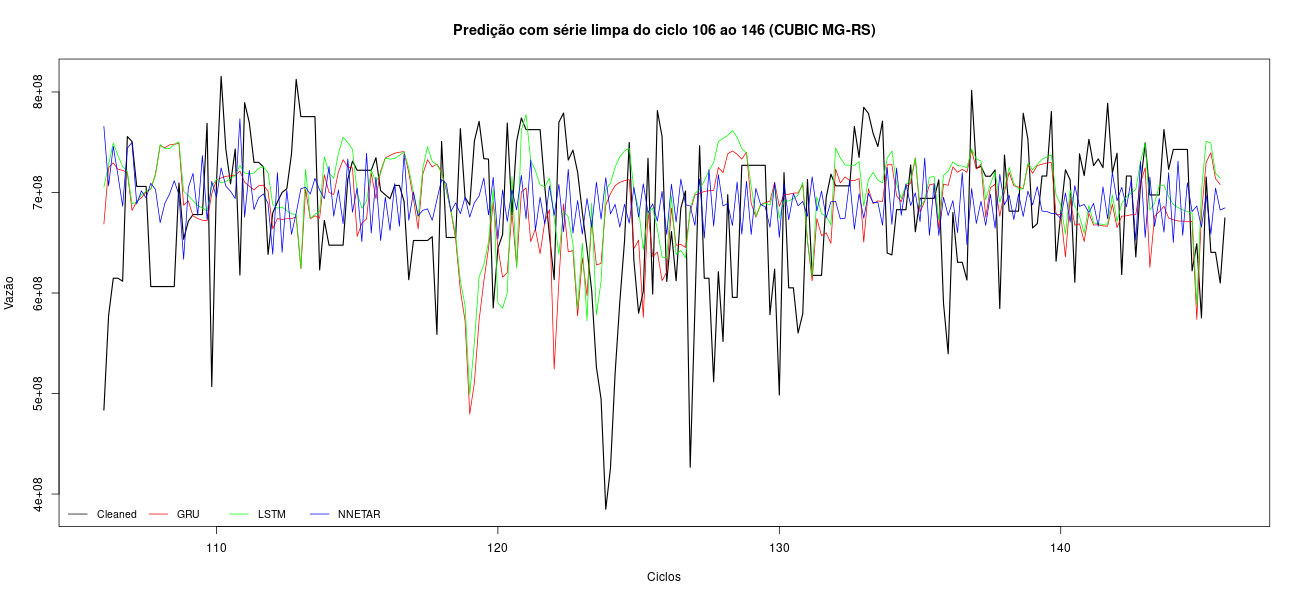

In [45]:
%%R -w 1300 -h 600

minimo = min(c(mytsTest106_Cleaned_MG_RS_cubic, Ts_Cleaned_pred_GRU_MG_RS_cubic, Ts_Cleaned_pred_LSTM_MG_RS_cubic, prevNeural105_Cleaned_MG_RS_cubic$mean)) - 1000
maximo = max(c(mytsTest106_Cleaned_MG_RS_cubic, Ts_Cleaned_pred_GRU_MG_RS_cubic, Ts_Cleaned_pred_LSTM_MG_RS_cubic, prevNeural105_Cleaned_MG_RS_cubic$mean)) + 1000
plot(mytsTest106_Cleaned_MG_RS_cubic, main= "Predição com série limpa do ciclo 106 ao 146 (CUBIC MG-RS)", xlab="Ciclos", ylab="Vazāo", ylim=c(minimo, maximo), lwd=1.5)
lines(Ts_Cleaned_pred_GRU_MG_RS_cubic, col="red", border="orange")
lines(Ts_Cleaned_pred_LSTM_MG_RS_cubic, col="green")
lines(prevNeural105_Cleaned_MG_RS_cubic$mean, col="blue")
legend("bottomleft", legend = c("Cleaned", "GRU", "LSTM","NNETAR"), 
       col = c("black", "red","green","blue"), lty=1:1, cex=0.87, bty = "n", horiz=T)

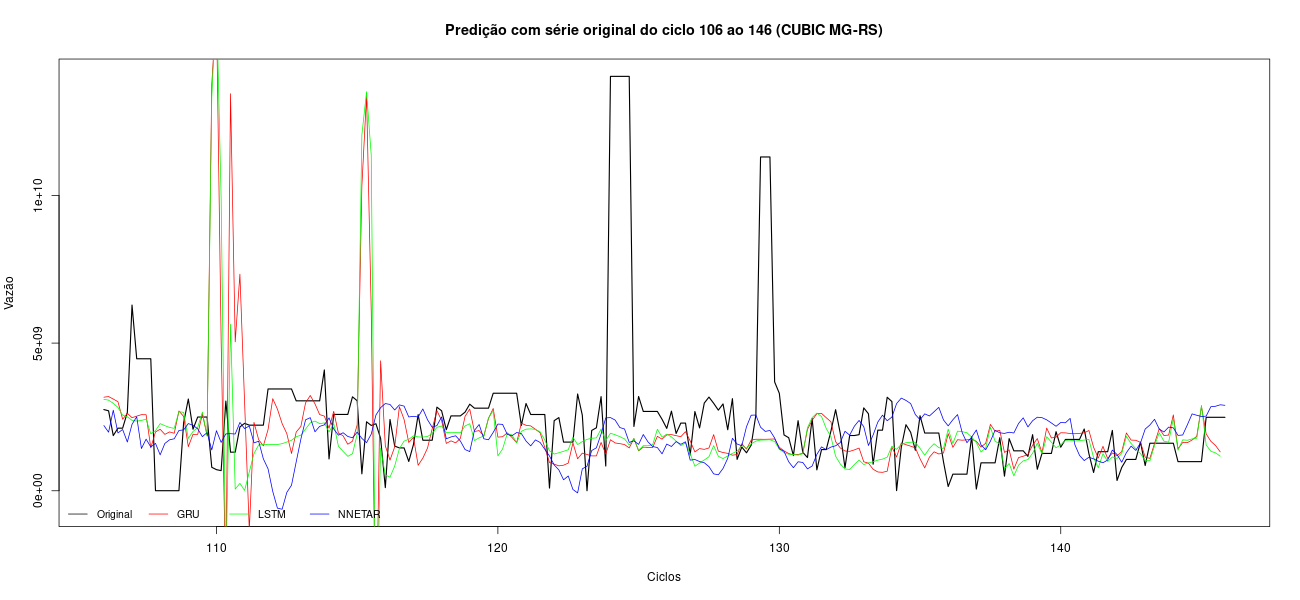

In [46]:
%%R -w 1300 -h 600

minimo = min(c(mytsTest106_Original_MG_RS_cubic, prevNeural105_Original_MG_RS_cubic$mean)) - 1000 # , Ts_Original_pred_GRU_MG_RS_cubic, Ts_Original_pred_LSTM_MG_RS_cubic,
maximo = max(c(mytsTest106_Original_MG_RS_cubic, prevNeural105_Original_MG_RS_cubic$mean)) + 1000 # , Ts_Original_pred_GRU_MG_RS_cubic, Ts_Original_pred_LSTM_MG_RS_cubic, 
plot(mytsTest106_Original_MG_RS_cubic, main= "Predição com série original do ciclo 106 ao 146 (CUBIC MG-RS)", xlab="Ciclos", ylab="Vazāo", ylim=c(minimo, maximo), lwd=1.5)
lines(Ts_Original_pred_GRU_MG_RS_cubic, col="red", border="orange")
lines(Ts_Original_pred_LSTM_MG_RS_cubic, col="green")
lines(prevNeural105_Original_MG_RS_cubic$mean, col="blue")
legend("bottomleft", legend = c("Original", "GRU", "LSTM","NNETAR"), 
       col = c("black", "red","green","blue"), lty=1:1, cex=0.87, bty = "n", horiz=T)

### Geraçāo de gráficos PA-BA

In [47]:
Ts_Original_PA_BA_cubic = pd.read_csv('datasets vazao/original/cubic/cubic esmond data pa-ba 10-21-2022.csv')
Ts_Original_pred_GRU_PA_BA_cubic = pd.read_csv('./predicoes vazao/original/GRU/cubic/prediction_plot_cubic_PA-BA_GRU.csv')
Ts_Original_pred_LSTM_PA_BA_cubic = pd.read_csv('./predicoes vazao/original/LSTM/cubic/prediction_plot_cubic_PA-BA_LSTM.csv')
Ts_Cleaned_PA_BA_cubic = pd.read_csv('datasets vazao/sem outliers/cubic/sem outliers cubic PA-BA 10-21.csv')
Ts_Cleaned_pred_GRU_PA_BA_cubic = pd.read_csv('./predicoes vazao/cleaned/GRU/cubic/prediction_plot_cubic_PA-BA_GRU.csv')
Ts_Cleaned_pred_LSTM_PA_BA_cubic = pd.read_csv('./predicoes vazao/cleaned/LSTM/cubic/prediction_plot_cubic_PA-BA_LSTM.csv')

In [48]:
%%R -i Ts_Cleaned_pred_GRU_PA_BA_cubic -i Ts_Cleaned_pred_LSTM_PA_BA_cubic -i Ts_Cleaned_PA_BA_cubic -i Ts_Original_PA_BA_cubic -i Ts_Original_pred_GRU_PA_BA_cubic -i Ts_Original_pred_LSTM_PA_BA_cubic

Ts_Original_PA_BA_cubic = ts(Ts_Original_PA_BA_cubic, start = c(1,1), end= c(1,900), frequency = 6)
Ts_Original_pred_GRU_PA_BA_cubic = ts(Ts_Original_pred_GRU_PA_BA_cubic, start = c(106,1), frequency = 6)
Ts_Original_pred_LSTM_PA_BA_cubic = ts(Ts_Original_pred_LSTM_PA_BA_cubic, start = c(106,1), frequency = 6)
Ts_Cleaned_pred_GRU_PA_BA_cubic = ts(Ts_Cleaned_pred_GRU_PA_BA_cubic, start = c(106,1), frequency = 6)
Ts_Cleaned_pred_LSTM_PA_BA_cubic = ts(Ts_Cleaned_pred_LSTM_PA_BA_cubic, start = c(106,1), frequency = 6)
Ts_Cleaned_View_R_PA_BA_cubic = ts(Ts_Cleaned_PA_BA_cubic, start = c(1,1), end= c(1,900), frequency = 6)

In [49]:
%%R # Separar conjuntos de treino

mytsTrain105_Original_PA_BA_cubic = window(Ts_Original_PA_BA_cubic, start = c(1,1), end = c(105,6))
mytsTest106_Original_PA_BA_cubic = window(Ts_Original_PA_BA_cubic, start = c(106,1), end = c(145,6))
mytsNeural105_Original_PA_BA_cubic = nnetar(mytsTrain105_Original_PA_BA_cubic)
prevNeural105_Original_PA_BA_cubic = forecast(mytsNeural105_Original_PA_BA_cubic, h=240)

mytsTrain105_Cleaned_PA_BA_cubic = window(Ts_Cleaned_View_R_PA_BA_cubic, start = c(1,1), end = c(105,6))
mytsTest106_Cleaned_PA_BA_cubic = window(Ts_Cleaned_View_R_PA_BA_cubic, start = c(106,1), end = c(145,6))
mytsNeural105_Cleaned_PA_BA_cubic = nnetar(mytsTrain105_Cleaned_PA_BA_cubic)
prevNeural105_Cleaned_PA_BA_cubic = forecast(mytsNeural105_Cleaned_PA_BA_cubic, h=240)


In [50]:
%%R # salvar predição NNETAR e serie de Teste

dt_prevNeural105_Original_PA_BA_cubic = data.frame(prevNeural105_Original_PA_BA_cubic$mean)
names(dt_prevNeural105_Original_PA_BA_cubic) = NULL
write.csv(dt_prevNeural105_Original_PA_BA_cubic,"./predicoes vazao/original/NNETAR/cubic/prediction_plot_cubic_PA-BA_NNETAR.csv", row.names = FALSE)
dt_Test106_Original_PA_BA_cubic = data.frame(mytsTest106_Original_PA_BA_cubic)
names(dt_Test106_Original_PA_BA_cubic) = NULL
write.csv(dt_Test106_Original_PA_BA_cubic,"./predicoes vazao/series de teste/original/cubic/mytsTest106_plot_cubic_PA-BA.csv", row.names = FALSE)

dt_prevNeural105_Cleaned_PA_BA_cubic = data.frame(prevNeural105_Cleaned_PA_BA_cubic$mean)
names(dt_prevNeural105_Cleaned_PA_BA_cubic) = NULL
write.csv(dt_prevNeural105_Cleaned_PA_BA_cubic,"./predicoes vazao/cleaned/NNETAR/cubic/prediction_plot_cubic_PA-BA_NNETAR.csv", row.names = FALSE)
dt_Test106_Cleaned_PA_BA_cubic = data.frame(mytsTest106_Cleaned_PA_BA_cubic)
names(dt_Test106_Cleaned_PA_BA_cubic) = NULL
write.csv(dt_Test106_Cleaned_PA_BA_cubic,"./predicoes vazao/series de teste/cleaned/cubic/mytsTest106_plot_cubic_PA-BA.csv", row.names = FALSE)

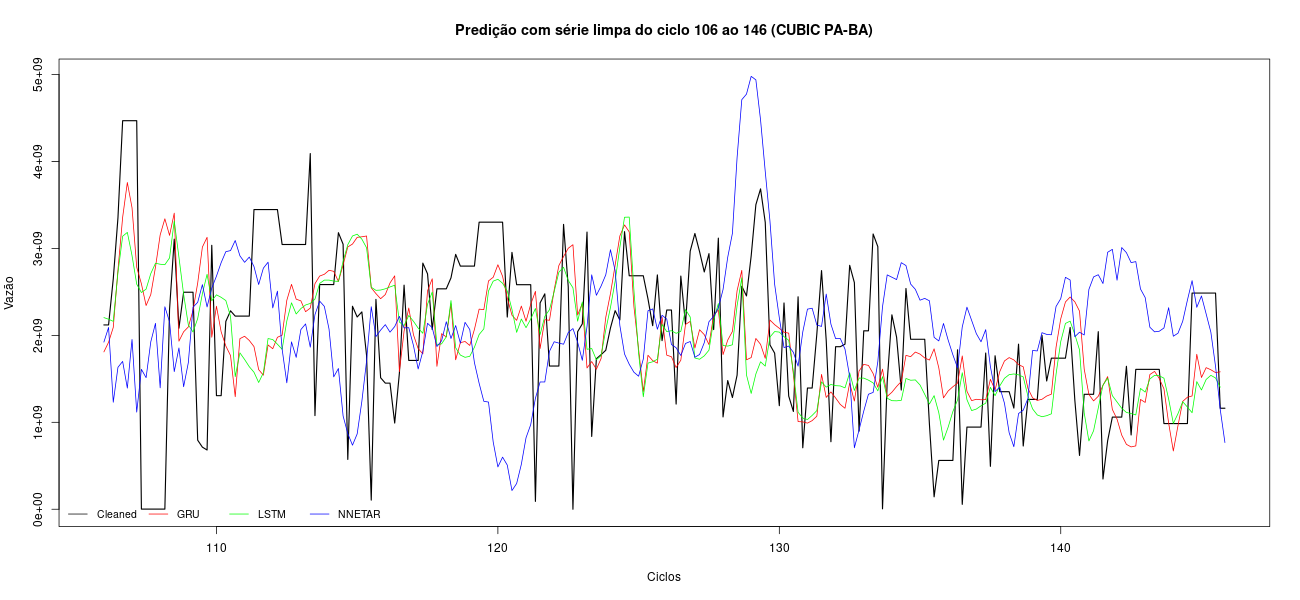

In [51]:
%%R -w 1300 -h 600

minimo = min(c(mytsTest106_Cleaned_PA_BA_cubic, Ts_Cleaned_pred_GRU_PA_BA_cubic, Ts_Cleaned_pred_LSTM_PA_BA_cubic, prevNeural105_Cleaned_PA_BA_cubic$mean)) - 1000
maximo = max(c(mytsTest106_Cleaned_PA_BA_cubic, Ts_Cleaned_pred_GRU_PA_BA_cubic, Ts_Cleaned_pred_LSTM_PA_BA_cubic, prevNeural105_Cleaned_PA_BA_cubic$mean)) + 1000
plot(mytsTest106_Cleaned_PA_BA_cubic, main= "Predição com série limpa do ciclo 106 ao 146 (CUBIC PA-BA)", xlab="Ciclos", ylab="Vazāo", ylim=c(minimo, maximo), lwd=1.5)
lines(Ts_Cleaned_pred_GRU_PA_BA_cubic, col="red", border="orange")
lines(Ts_Cleaned_pred_LSTM_PA_BA_cubic, col="green")
lines(prevNeural105_Cleaned_PA_BA_cubic$mean, col="blue")
legend("bottomleft", legend = c("Cleaned", "GRU", "LSTM","NNETAR"), 
       col = c("black", "red","green","blue"), lty=1:1, cex=0.87, bty = "n", horiz=T)

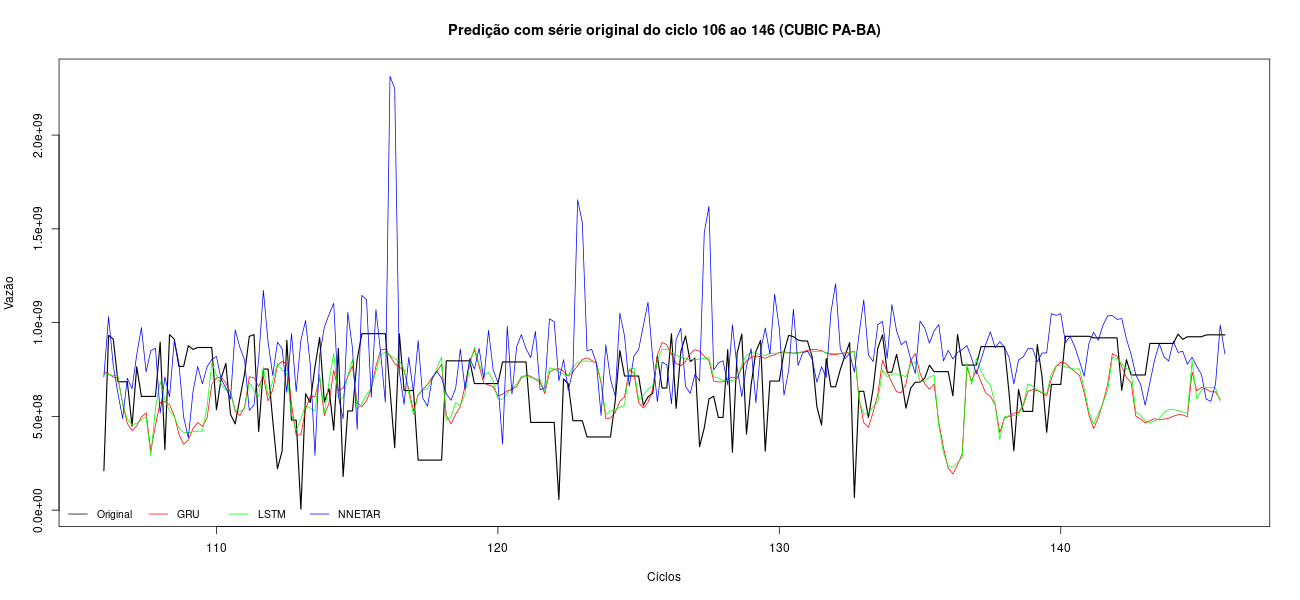

In [52]:
%%R -w 1300 -h 600

minimo = min(c(mytsTest106_Original_PA_BA_cubic, prevNeural105_Original_PA_BA_cubic$mean)) - 1000 # , Ts_Original_pred_GRU_PA_BA_cubic, Ts_Original_pred_LSTM_PA_BA_cubic,
maximo = max(c(mytsTest106_Original_PA_BA_cubic, prevNeural105_Original_PA_BA_cubic$mean)) + 1000 # , Ts_Original_pred_GRU_PA_BA_cubic, Ts_Original_pred_LSTM_PA_BA_cubic, 
plot(mytsTest106_Original_PA_BA_cubic, main= "Predição com série original do ciclo 106 ao 146 (CUBIC PA-BA)", xlab="Ciclos", ylab="Vazāo", ylim=c(minimo, maximo), lwd=1.5)
lines(Ts_Original_pred_GRU_PA_BA_cubic, col="red", border="orange")
lines(Ts_Original_pred_LSTM_PA_BA_cubic, col="green")
lines(prevNeural105_Original_PA_BA_cubic$mean, col="blue")
legend("bottomleft", legend = c("Original", "GRU", "LSTM","NNETAR"), 
       col = c("black", "red","green","blue"), lty=1:1, cex=0.87, bty = "n", horiz=T)

### Geraçāo de gráficos PR-AM

In [53]:
Ts_Original_PR_AM_cubic = pd.read_csv('datasets vazao/original/cubic/cubic esmond data pr-am 10-21-2022.csv')
Ts_Original_pred_GRU_PR_AM_cubic = pd.read_csv('./predicoes vazao/original/GRU/cubic/prediction_plot_cubic_PR-AM_GRU.csv')
Ts_Original_pred_LSTM_PR_AM_cubic = pd.read_csv('./predicoes vazao/original/LSTM/cubic/prediction_plot_cubic_PR-AM_LSTM.csv')
Ts_Cleaned_PR_AM_cubic = pd.read_csv('datasets vazao/sem outliers/cubic/sem outliers cubic PR-AM 10-21.csv')
Ts_Cleaned_pred_GRU_PR_AM_cubic = pd.read_csv('./predicoes vazao/cleaned/GRU/cubic/prediction_plot_cubic_PR-AM_GRU.csv')
Ts_Cleaned_pred_LSTM_PR_AM_cubic = pd.read_csv('./predicoes vazao/cleaned/LSTM/cubic/prediction_plot_cubic_PR-AM_LSTM.csv')

In [54]:
%%R -i Ts_Cleaned_pred_GRU_PR_AM_cubic -i Ts_Cleaned_pred_LSTM_PR_AM_cubic -i Ts_Cleaned_PR_AM_cubic -i Ts_Original_PR_AM_cubic -i Ts_Original_pred_GRU_PR_AM_cubic -i Ts_Original_pred_LSTM_PR_AM_cubic

Ts_Original_PR_AM_cubic = ts(Ts_Original_PR_AM_cubic, start = c(1,1), end= c(1,900), frequency = 6)
Ts_Original_pred_GRU_PR_AM_cubic = ts(Ts_Original_pred_GRU_PR_AM_cubic, start = c(106,1), frequency = 6)
Ts_Original_pred_LSTM_PR_AM_cubic = ts(Ts_Original_pred_LSTM_PR_AM_cubic, start = c(106,1), frequency = 6)
Ts_Cleaned_pred_GRU_PR_AM_cubic = ts(Ts_Cleaned_pred_GRU_PR_AM_cubic, start = c(106,1), frequency = 6)
Ts_Cleaned_pred_LSTM_PR_AM_cubic = ts(Ts_Cleaned_pred_LSTM_PR_AM_cubic, start = c(106,1), frequency = 6)
Ts_Cleaned_View_R_PR_AM_cubic = ts(Ts_Cleaned_PR_AM_cubic, start = c(1,1), end= c(1,900), frequency = 6)

In [55]:
%%R # Separar conjuntos de treino

mytsTrain105_Original_PR_AM_cubic = window(Ts_Original_PR_AM_cubic, start = c(1,1), end = c(105,6))
mytsTest106_Original_PR_AM_cubic = window(Ts_Original_PR_AM_cubic, start = c(106,1), end = c(145,6))
mytsNeural105_Original_PR_AM_cubic = nnetar(mytsTrain105_Original_PR_AM_cubic)
prevNeural105_Original_PR_AM_cubic = forecast(mytsNeural105_Original_PR_AM_cubic, h=240)

mytsTrain105_Cleaned_PR_AM_cubic = window(Ts_Cleaned_View_R_PR_AM_cubic, start = c(1,1), end = c(105,6))
mytsTest106_Cleaned_PR_AM_cubic = window(Ts_Cleaned_View_R_PR_AM_cubic, start = c(106,1), end = c(145,6))
mytsNeural105_Cleaned_PR_AM_cubic = nnetar(mytsTrain105_Cleaned_PR_AM_cubic)
prevNeural105_Cleaned_PR_AM_cubic = forecast(mytsNeural105_Cleaned_PR_AM_cubic, h=240)


In [56]:
%%R # salvar predição NNETAR

dt_prevNeural105_Original_PR_AM_cubic = data.frame(prevNeural105_Original_PR_AM_cubic$mean)
names(dt_prevNeural105_Original_PR_AM_cubic) = NULL
write.csv(dt_prevNeural105_Original_PR_AM_cubic,"./predicoes vazao/original/NNETAR/cubic/prediction_plot_cubic_PR-AM_NNETAR.csv", row.names = FALSE)
dt_Test106_Original_PR_AM_cubic = data.frame(mytsTest106_Original_PR_AM_cubic)
names(dt_Test106_Original_PR_AM_cubic) = NULL
write.csv(dt_Test106_Original_PR_AM_cubic,"./predicoes vazao/series de teste/original/cubic/mytsTest106_plot_cubic_PR-AM.csv", row.names = FALSE)

dt_prevNeural105_Cleaned_PR_AM_cubic = data.frame(prevNeural105_Cleaned_PR_AM_cubic$mean)
names(dt_prevNeural105_Cleaned_PR_AM_cubic) = NULL
write.csv(dt_prevNeural105_Cleaned_PR_AM_cubic,"./predicoes vazao/cleaned/NNETAR/cubic/prediction_plot_cubic_PR-AM_NNETAR.csv", row.names = FALSE)
dt_Test106_Cleaned_PR_AM_cubic = data.frame(mytsTest106_Cleaned_PR_AM_cubic)
names(dt_Test106_Cleaned_PR_AM_cubic) = NULL
write.csv(dt_Test106_Cleaned_PR_AM_cubic,"./predicoes vazao/series de teste/cleaned/cubic/mytsTest106_plot_cubic_PR-AM.csv", row.names = FALSE)

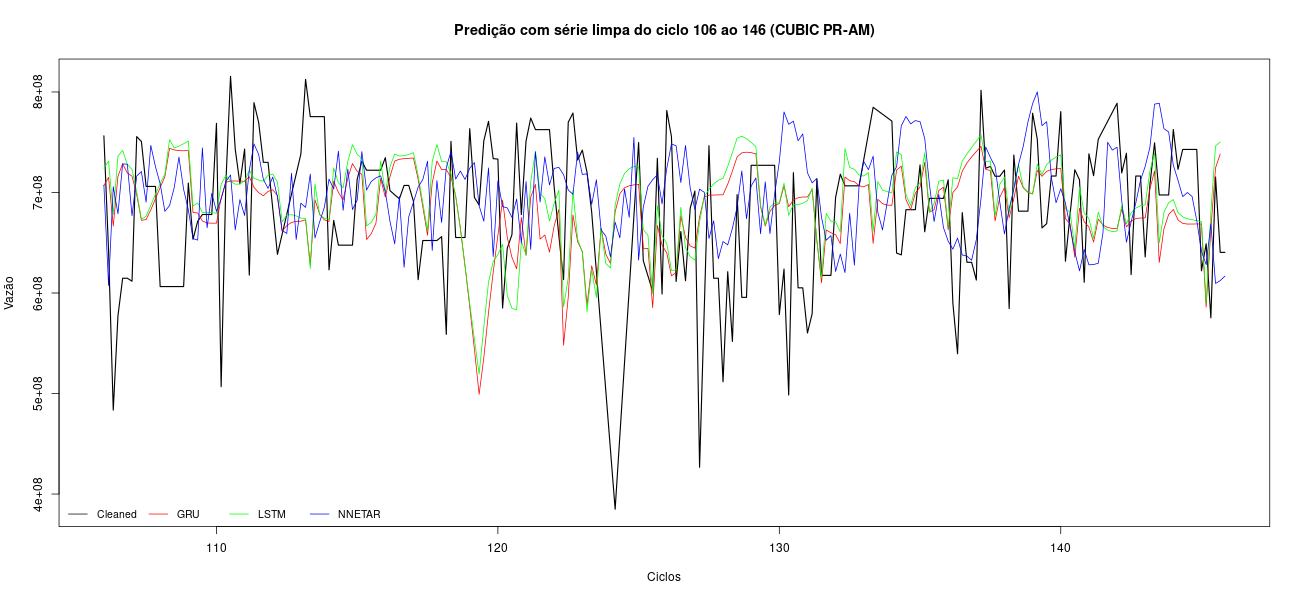

In [57]:
%%R -w 1300 -h 600

minimo = min(c(mytsTest106_Cleaned_PR_AM_cubic, Ts_Cleaned_pred_GRU_PR_AM_cubic, Ts_Cleaned_pred_LSTM_PR_AM_cubic, prevNeural105_Cleaned_PR_AM_cubic$mean)) - 1000
maximo = max(c(mytsTest106_Cleaned_PR_AM_cubic, Ts_Cleaned_pred_GRU_PR_AM_cubic, Ts_Cleaned_pred_LSTM_PR_AM_cubic, prevNeural105_Cleaned_PR_AM_cubic$mean)) + 1000
plot(mytsTest106_Cleaned_PR_AM_cubic, main= "Predição com série limpa do ciclo 106 ao 146 (CUBIC PR-AM)", xlab="Ciclos", ylab="Vazāo", ylim=c(minimo, maximo), lwd=1.5)
lines(Ts_Cleaned_pred_GRU_PR_AM_cubic, col="red", border="orange")
lines(Ts_Cleaned_pred_LSTM_PR_AM_cubic, col="green")
lines(prevNeural105_Cleaned_PR_AM_cubic$mean, col="blue")
legend("bottomleft", legend = c("Cleaned", "GRU", "LSTM","NNETAR"), 
       col = c("black", "red","green","blue"), lty=1:1, cex=0.87, bty = "n", horiz=T)

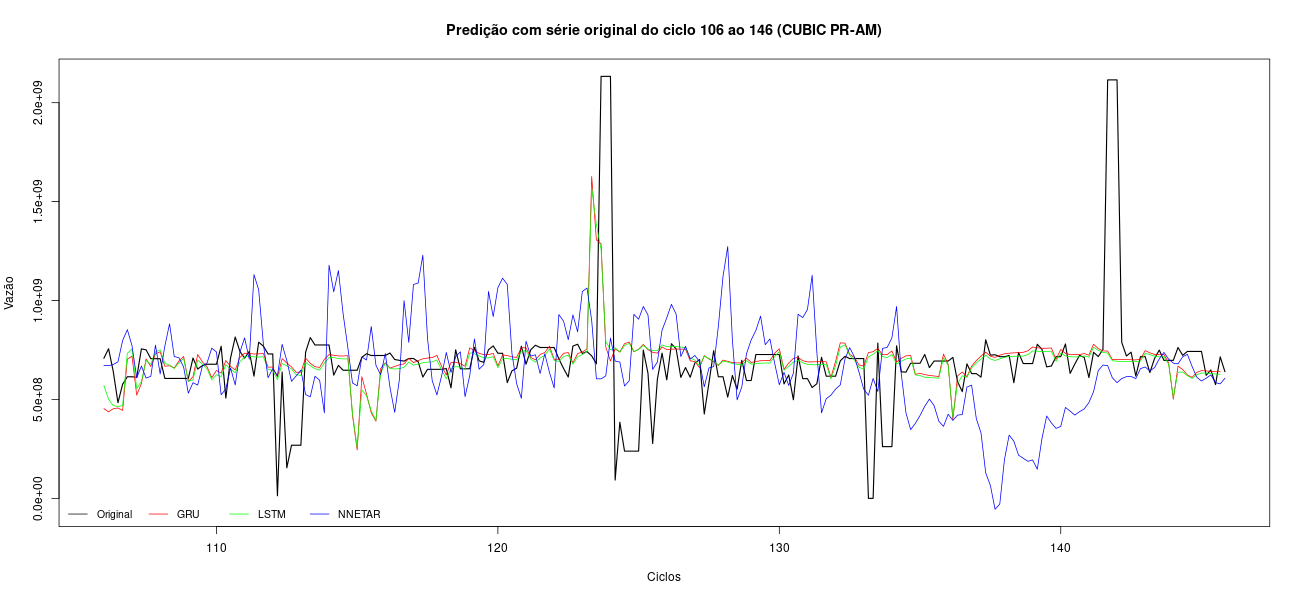

In [58]:
%%R -w 1300 -h 600

minimo = min(c(mytsTest106_Original_PR_AM_cubic, prevNeural105_Original_PR_AM_cubic$mean)) - 1000 # , Ts_Original_pred_GRU_PR_AM_cubic, Ts_Original_pred_LSTM_PR_AM_cubic,
maximo = max(c(mytsTest106_Original_PR_AM_cubic, prevNeural105_Original_PR_AM_cubic$mean)) + 1000 # , Ts_Original_pred_GRU_PR_AM_cubic, Ts_Original_pred_LSTM_PR_AM_cubic, 
plot(mytsTest106_Original_PR_AM_cubic, main= "Predição com série original do ciclo 106 ao 146 (CUBIC PR-AM)", xlab="Ciclos", ylab="Vazāo", ylim=c(minimo, maximo), lwd=1.5)
lines(Ts_Original_pred_GRU_PR_AM_cubic, col="red", border="orange")
lines(Ts_Original_pred_LSTM_PR_AM_cubic, col="green")
lines(prevNeural105_Original_PR_AM_cubic$mean, col="blue")
legend("bottomleft", legend = c("Original", "GRU", "LSTM","NNETAR"), 
       col = c("black", "red","green","blue"), lty=1:1, cex=0.87, bty = "n", horiz=T)

### Gerando as faixas de comparação Cleaned

In [59]:
# importando (para o python) as predições feitas pelo nnetar e as series temporais de teste respectivas
Ts_Cleaned_pred_NNETAR_CE_SP_bbr = pd.read_csv('./predicoes vazao/cleaned/NNETAR/bbr/prediction_plot_bbr_CE-SP_NNETAR.csv')
Ts_Cleaned_pred_NNETAR_MG_RS_bbr = pd.read_csv('./predicoes vazao/cleaned/NNETAR/bbr/prediction_plot_bbr_MG-RS_NNETAR.csv')
Ts_Cleaned_pred_NNETAR_PA_BA_bbr = pd.read_csv('./predicoes vazao/cleaned/NNETAR/bbr/prediction_plot_bbr_PA-BA_NNETAR.csv')
Ts_Cleaned_pred_NNETAR_PR_AM_bbr = pd.read_csv('./predicoes vazao/cleaned/NNETAR/bbr/prediction_plot_bbr_PR-AM_NNETAR.csv')

Ts_Cleaned_pred_NNETAR_CE_SP_cubic = pd.read_csv('./predicoes vazao/cleaned/NNETAR/cubic/prediction_plot_cubic_CE-SP_NNETAR.csv')
Ts_Cleaned_pred_NNETAR_MG_RS_cubic = pd.read_csv('./predicoes vazao/cleaned/NNETAR/cubic/prediction_plot_cubic_MG-RS_NNETAR.csv')
Ts_Cleaned_pred_NNETAR_PA_BA_cubic = pd.read_csv('./predicoes vazao/cleaned/NNETAR/cubic/prediction_plot_cubic_PA-BA_NNETAR.csv')
Ts_Cleaned_pred_NNETAR_PR_AM_cubic = pd.read_csv('./predicoes vazao/cleaned/NNETAR/cubic/prediction_plot_cubic_PR-AM_NNETAR.csv')

# variáveis de teste
mytsTest106_Cleaned_CE_SP_bbr = pd.read_csv('./predicoes vazao/series de teste/cleaned/bbr/mytsTest106_plot_bbr_CE-SP.csv')
mytsTest106_Cleaned_MG_RS_bbr = pd.read_csv('./predicoes vazao/series de teste/cleaned/bbr/mytsTest106_plot_bbr_MG-RS.csv')
mytsTest106_Cleaned_PA_BA_bbr = pd.read_csv('./predicoes vazao/series de teste/cleaned/bbr/mytsTest106_plot_bbr_PA-BA.csv')
mytsTest106_Cleaned_PR_AM_bbr = pd.read_csv('./predicoes vazao/series de teste/cleaned/bbr/mytsTest106_plot_bbr_PR-AM.csv')

mytsTest106_Cleaned_CE_SP_cubic = pd.read_csv('./predicoes vazao/series de teste/cleaned/cubic/mytsTest106_plot_cubic_CE-SP.csv')
mytsTest106_Cleaned_MG_RS_cubic = pd.read_csv('./predicoes vazao/series de teste/cleaned/cubic/mytsTest106_plot_cubic_MG-RS.csv')
mytsTest106_Cleaned_PA_BA_cubic = pd.read_csv('./predicoes vazao/series de teste/cleaned/cubic/mytsTest106_plot_cubic_PA-BA.csv')
mytsTest106_Cleaned_PR_AM_cubic = pd.read_csv('./predicoes vazao/series de teste/cleaned/cubic/mytsTest106_plot_cubic_PR-AM.csv')

In [60]:
# classificando os valores das series (listas: python)

series_teste_predicao_cleaned = {"mytsTest106_Cleaned_CE_SP_bbr": mytsTest106_Cleaned_CE_SP_bbr,
                        "mytsTest106_Cleaned_CE_SP_cubic": mytsTest106_Cleaned_CE_SP_cubic,
                        "mytsTest106_Cleaned_MG_RS_bbr": mytsTest106_Cleaned_MG_RS_bbr,
                        "mytsTest106_Cleaned_MG_RS_cubic": mytsTest106_Cleaned_MG_RS_cubic,
                        "mytsTest106_Cleaned_PA_BA_bbr": mytsTest106_Cleaned_PA_BA_bbr,
                        "mytsTest106_Cleaned_PA_BA_cubic": mytsTest106_Cleaned_PA_BA_cubic,
                        "mytsTest106_Cleaned_PR_AM_bbr": mytsTest106_Cleaned_PR_AM_bbr,
                        "mytsTest106_Cleaned_PR_AM_cubic": mytsTest106_Cleaned_PR_AM_cubic,
                        "Ts_Cleaned_pred_GRU_CE_SP_bbr": Ts_Cleaned_pred_GRU_CE_SP_bbr,
                        "Ts_Cleaned_pred_GRU_CE_SP_cubic": Ts_Cleaned_pred_GRU_CE_SP_cubic,
                        "Ts_Cleaned_pred_GRU_MG_RS_bbr": Ts_Cleaned_pred_GRU_MG_RS_bbr,
                        "Ts_Cleaned_pred_GRU_MG_RS_cubic": Ts_Cleaned_pred_GRU_MG_RS_cubic,
                        "Ts_Cleaned_pred_GRU_PA_BA_bbr": Ts_Cleaned_pred_GRU_PA_BA_bbr,
                        "Ts_Cleaned_pred_GRU_PA_BA_cubic": Ts_Cleaned_pred_GRU_PA_BA_cubic,
                        "Ts_Cleaned_pred_GRU_PR_AM_bbr": Ts_Cleaned_pred_GRU_PR_AM_bbr,
                        "Ts_Cleaned_pred_GRU_PR_AM_cubic": Ts_Cleaned_pred_GRU_PR_AM_cubic,
                        "Ts_Cleaned_pred_LSTM_CE_SP_bbr": Ts_Cleaned_pred_LSTM_CE_SP_bbr,
                        "Ts_Cleaned_pred_LSTM_CE_SP_cubic": Ts_Cleaned_pred_LSTM_CE_SP_cubic,
                        "Ts_Cleaned_pred_LSTM_MG_RS_bbr": Ts_Cleaned_pred_LSTM_MG_RS_bbr,
                        "Ts_Cleaned_pred_LSTM_MG_RS_cubic": Ts_Cleaned_pred_LSTM_MG_RS_cubic,
                        "Ts_Cleaned_pred_LSTM_PA_BA_bbr": Ts_Cleaned_pred_LSTM_PA_BA_bbr,
                        "Ts_Cleaned_pred_LSTM_PA_BA_cubic": Ts_Cleaned_pred_LSTM_PA_BA_cubic,
                        "Ts_Cleaned_pred_LSTM_PR_AM_bbr": Ts_Cleaned_pred_LSTM_PR_AM_bbr,
                        "Ts_Cleaned_pred_LSTM_PR_AM_cubic": Ts_Cleaned_pred_LSTM_PR_AM_cubic,
                        "Ts_Cleaned_pred_NNETAR_CE_SP_bbr": Ts_Cleaned_pred_NNETAR_CE_SP_bbr,
                        "Ts_Cleaned_pred_NNETAR_CE_SP_cubic": Ts_Cleaned_pred_NNETAR_CE_SP_cubic,
                        "Ts_Cleaned_pred_NNETAR_MG_RS_bbr": Ts_Cleaned_pred_NNETAR_MG_RS_bbr,
                        "Ts_Cleaned_pred_NNETAR_MG_RS_cubic": Ts_Cleaned_pred_NNETAR_MG_RS_cubic,
                        "Ts_Cleaned_pred_NNETAR_PA_BA_bbr": Ts_Cleaned_pred_NNETAR_PA_BA_bbr,
                        "Ts_Cleaned_pred_NNETAR_PA_BA_cubic": Ts_Cleaned_pred_NNETAR_PA_BA_cubic,
                        "Ts_Cleaned_pred_NNETAR_PR_AM_bbr": Ts_Cleaned_pred_NNETAR_PR_AM_bbr,
                        "Ts_Cleaned_pred_NNETAR_PR_AM_cubic": Ts_Cleaned_pred_NNETAR_PR_AM_cubic}

arquivos = ["CE_SP_bbr",
            "CE_SP_cubic",
            "MG_RS_bbr",
            "MG_RS_cubic",
            "PA_BA_bbr",
            "PA_BA_cubic",
            "PR_AM_bbr",
            "PR_AM_cubic"]

lista_nomes_series_cleaned = list(series_teste_predicao_cleaned.keys())

dict_series_faixas_cleaned = {}
dict_series_acerto_erro_cleaned = {}

if len(series_teste_predicao_cleaned) == 32:
    for ts_name, value in series_teste_predicao_cleaned.items():
        if ts_name.startswith("mytsTest"):
            dict_series_faixas_cleaned.setdefault(ts_name, None)
        else:
            dict_series_faixas_cleaned.setdefault(ts_name, None)
            dict_series_acerto_erro_cleaned.setdefault(ts_name, None)

    for ts_name, value in series_teste_predicao_cleaned.items():
        lista_aux = []
        for valor in value[value.columns[0]].to_list():
            valor = float(valor)
            if valor < 200000000:
                lista_aux.append("r")
            elif valor >= 200000000 and valor < 500000000:
                lista_aux.append("o")
            elif valor >= 500000000 and valor < 800000000:
                lista_aux.append("y")
            elif valor >= 800000000 and valor < 1000000000:
                lista_aux.append("b")
            else:
                lista_aux.append("g")
        dict_series_faixas_cleaned[ts_name] = lista_aux
    
    dict_numero_acertos_cleaned = dict_series_acerto_erro_cleaned.copy()
    dict_series_acerto_erro_cleaned = dict_series_acerto_erro_cleaned.copy()

    for finais in arquivos:
        series = list(filter(lambda x: x.endswith(finais), lista_nomes_series_cleaned))
        series_teste = list(filter(lambda x: x.startswith("myts"), series))[0]
        faixa_teste = dict_series_faixas_cleaned[series_teste]
        series.remove(series_teste)
        for serie in series:
            faixa_prevista = dict_series_faixas_cleaned[serie]
            lista_aux = []
            #print(serie, series_teste)
            for i in range(len(dict_series_faixas_cleaned[series_teste])):
                if faixa_teste[i] == faixa_prevista[i]:
                    lista_aux.append(1)
                else:
                    lista_aux.append(0)
            dict_series_acerto_erro_cleaned[serie] = lista_aux
            dict_numero_acertos_cleaned[serie] = lista_aux.count(1)

    for name_previsao in natsorted(sorted(dict_numero_acertos_cleaned.keys())):
        x = PrettyTable()
        #print(name_previsao, dict_numero_acertos_cleaned[name_previsao])
        name_test = list(filter(lambda x: x.startswith("myts") and x.endswith(name_previsao[-9:]), lista_nomes_series_cleaned))[0]
        x.field_names = ["Teste "+name_test, "Previsto "+name_previsao]
        for j in range(len(dict_series_faixas_cleaned[name_previsao])):
            x.add_row([dict_series_faixas_cleaned[name_test][j],dict_series_faixas_cleaned[name_previsao][j]])
        #print(x) # tabelas de comparação

    porcentagens_acerto_cleaned = {}
    y = PrettyTable()
    y.field_names = ["Previsão", "% de acerto"]
    for name_previsao in sorted(dict_numero_acertos_cleaned.keys()):
        porcentagem = (dict_numero_acertos_cleaned[name_previsao]/239)*100
        porcentagens_acerto_cleaned[name_previsao] = porcentagem
        y.add_row([name_previsao, "{:.2f}%".format(porcentagem)])
    print(y)


        
else:
    print("Número de séries passadas errado")



+------------------------------------+-------------+
|              Previsão              | % de acerto |
+------------------------------------+-------------+
|   Ts_Cleaned_pred_GRU_CE_SP_bbr    |   100.00%   |
|  Ts_Cleaned_pred_GRU_CE_SP_cubic   |   100.00%   |
|   Ts_Cleaned_pred_GRU_MG_RS_bbr    |   100.00%   |
|  Ts_Cleaned_pred_GRU_MG_RS_cubic   |    96.23%   |
|   Ts_Cleaned_pred_GRU_PA_BA_bbr    |    91.63%   |
|  Ts_Cleaned_pred_GRU_PA_BA_cubic   |    81.59%   |
|   Ts_Cleaned_pred_GRU_PR_AM_bbr    |   100.00%   |
|  Ts_Cleaned_pred_GRU_PR_AM_cubic   |    95.82%   |
|   Ts_Cleaned_pred_LSTM_CE_SP_bbr   |   100.00%   |
|  Ts_Cleaned_pred_LSTM_CE_SP_cubic  |   100.00%   |
|   Ts_Cleaned_pred_LSTM_MG_RS_bbr   |   100.00%   |
|  Ts_Cleaned_pred_LSTM_MG_RS_cubic  |    96.23%   |
|   Ts_Cleaned_pred_LSTM_PA_BA_bbr   |    91.63%   |
|  Ts_Cleaned_pred_LSTM_PA_BA_cubic  |    82.43%   |
|   Ts_Cleaned_pred_LSTM_PR_AM_bbr   |   100.00%   |
|  Ts_Cleaned_pred_LSTM_PR_AM_cubic  |    96.2

### Gerando as faixas de comparação Original

In [81]:
# importando (para o python) as predições feitas pelo nnetar e as series temporais de teste respectivas
Ts_Original_pred_NNETAR_CE_SP_bbr = pd.read_csv('./predicoes vazao/original/NNETAR/bbr/prediction_plot_bbr_CE-SP_NNETAR.csv')
Ts_Original_pred_NNETAR_MG_RS_bbr = pd.read_csv('./predicoes vazao/original/NNETAR/bbr/prediction_plot_bbr_MG-RS_NNETAR.csv')
Ts_Original_pred_NNETAR_PA_BA_bbr = pd.read_csv('./predicoes vazao/original/NNETAR/bbr/prediction_plot_bbr_PA-BA_NNETAR.csv')
Ts_Original_pred_NNETAR_PR_AM_bbr = pd.read_csv('./predicoes vazao/original/NNETAR/bbr/prediction_plot_bbr_PR-AM_NNETAR.csv')

Ts_Original_pred_NNETAR_CE_SP_cubic = pd.read_csv('./predicoes vazao/original/NNETAR/cubic/prediction_plot_cubic_CE-SP_NNETAR.csv')
Ts_Original_pred_NNETAR_MG_RS_cubic = pd.read_csv('./predicoes vazao/original/NNETAR/cubic/prediction_plot_cubic_MG-RS_NNETAR.csv')
Ts_Original_pred_NNETAR_PA_BA_cubic = pd.read_csv('./predicoes vazao/original/NNETAR/cubic/prediction_plot_cubic_PA-BA_NNETAR.csv')
Ts_Original_pred_NNETAR_PR_AM_cubic = pd.read_csv('./predicoes vazao/original/NNETAR/cubic/prediction_plot_cubic_PR-AM_NNETAR.csv')

# variáveis de teste
mytsTest106_Original_CE_SP_bbr = pd.read_csv('./predicoes vazao/series de teste/original/bbr/mytsTest106_plot_bbr_CE-SP.csv')
mytsTest106_Original_MG_RS_bbr = pd.read_csv('./predicoes vazao/series de teste/original/bbr/mytsTest106_plot_bbr_MG-RS.csv')
mytsTest106_Original_PA_BA_bbr = pd.read_csv('./predicoes vazao/series de teste/original/bbr/mytsTest106_plot_bbr_PA-BA.csv')
mytsTest106_Original_PR_AM_bbr = pd.read_csv('./predicoes vazao/series de teste/original/bbr/mytsTest106_plot_bbr_PR-AM.csv')

mytsTest106_Original_CE_SP_cubic = pd.read_csv('./predicoes vazao/series de teste/original/cubic/mytsTest106_plot_cubic_CE-SP.csv')
mytsTest106_Original_MG_RS_cubic = pd.read_csv('./predicoes vazao/series de teste/original/cubic/mytsTest106_plot_cubic_MG-RS.csv')
mytsTest106_Original_PA_BA_cubic = pd.read_csv('./predicoes vazao/series de teste/original/cubic/mytsTest106_plot_cubic_PA-BA.csv')
mytsTest106_Original_PR_AM_cubic = pd.read_csv('./predicoes vazao/series de teste/original/cubic/mytsTest106_plot_cubic_PR-AM.csv')

In [82]:
# classificando os valores das series (listas: python)

series_teste_predicao_original = {"mytsTest106_Original_CE_SP_bbr": mytsTest106_Original_CE_SP_bbr,
                        "mytsTest106_Original_CE_SP_cubic": mytsTest106_Original_CE_SP_cubic,
                        "mytsTest106_Original_MG_RS_bbr": mytsTest106_Original_MG_RS_bbr,
                        "mytsTest106_Original_MG_RS_cubic": mytsTest106_Original_MG_RS_cubic,
                        "mytsTest106_Original_PA_BA_bbr": mytsTest106_Original_PA_BA_bbr,
                        "mytsTest106_Original_PA_BA_cubic": mytsTest106_Original_PA_BA_cubic,
                        "mytsTest106_Original_PR_AM_bbr": mytsTest106_Original_PR_AM_bbr,
                        "mytsTest106_Original_PR_AM_cubic": mytsTest106_Original_PR_AM_cubic,
                        "Ts_Original_pred_NNETAR_CE_SP_bbr": Ts_Original_pred_NNETAR_CE_SP_bbr,
                        "Ts_Original_pred_NNETAR_CE_SP_cubic": Ts_Original_pred_NNETAR_CE_SP_cubic,
                        "Ts_Original_pred_NNETAR_MG_RS_bbr": Ts_Original_pred_NNETAR_MG_RS_bbr,
                        "Ts_Original_pred_NNETAR_MG_RS_cubic": Ts_Original_pred_NNETAR_MG_RS_cubic,
                        "Ts_Original_pred_NNETAR_PA_BA_bbr": Ts_Original_pred_NNETAR_PA_BA_bbr,
                        "Ts_Original_pred_NNETAR_PA_BA_cubic": Ts_Original_pred_NNETAR_PA_BA_cubic,
                        "Ts_Original_pred_NNETAR_PR_AM_bbr": Ts_Original_pred_NNETAR_PR_AM_bbr,
                        "Ts_Original_pred_NNETAR_PR_AM_cubic": Ts_Original_pred_NNETAR_PR_AM_cubic,
                        "Ts_Original_pred_GRU_CE_SP_bbr": Ts_Original_pred_GRU_CE_SP_bbr,
                        "Ts_Original_pred_GRU_CE_SP_cubic": Ts_Original_pred_GRU_CE_SP_cubic,
                        "Ts_Original_pred_GRU_MG_RS_bbr": Ts_Original_pred_GRU_MG_RS_bbr,
                        "Ts_Original_pred_GRU_MG_RS_cubic": Ts_Original_pred_GRU_MG_RS_cubic,
                        "Ts_Original_pred_GRU_PA_BA_bbr": Ts_Original_pred_GRU_PA_BA_bbr,
                        "Ts_Original_pred_GRU_PA_BA_cubic": Ts_Original_pred_GRU_PA_BA_cubic,
                        "Ts_Original_pred_GRU_PR_AM_bbr": Ts_Original_pred_GRU_PR_AM_bbr,
                        "Ts_Original_pred_GRU_PR_AM_cubic": Ts_Original_pred_GRU_PR_AM_cubic,
                        "Ts_Original_pred_LSTM_CE_SP_bbr": Ts_Original_pred_LSTM_CE_SP_bbr,
                        "Ts_Original_pred_LSTM_CE_SP_cubic": Ts_Original_pred_LSTM_CE_SP_cubic,
                        "Ts_Original_pred_LSTM_MG_RS_bbr": Ts_Original_pred_LSTM_MG_RS_bbr,
                        "Ts_Original_pred_LSTM_MG_RS_cubic": Ts_Original_pred_LSTM_MG_RS_cubic,
                        "Ts_Original_pred_LSTM_PA_BA_bbr": Ts_Original_pred_LSTM_PA_BA_bbr,
                        "Ts_Original_pred_LSTM_PA_BA_cubic": Ts_Original_pred_LSTM_PA_BA_cubic,
                        "Ts_Original_pred_LSTM_PR_AM_bbr": Ts_Original_pred_LSTM_PR_AM_bbr,
                        "Ts_Original_pred_LSTM_PR_AM_cubic": Ts_Original_pred_LSTM_PR_AM_cubic}

arquivos = ["CE_SP_bbr",
            "CE_SP_cubic",
            "MG_RS_bbr",
            "MG_RS_cubic",
            "PA_BA_bbr",
            "PA_BA_cubic",
            "PR_AM_bbr",
            "PR_AM_cubic"]

lista_nomes_series_original = list(series_teste_predicao_original.keys())

dict_series_faixas_original = {}
dict_series_acerto_erro_original = {}

if len(series_teste_predicao_original) == 32:
    for ts_name, value in series_teste_predicao_original.items():
        if ts_name.startswith("mytsTest"):
            dict_series_faixas_original.setdefault(ts_name, None)
        else:
            dict_series_faixas_original.setdefault(ts_name, None)
            dict_series_acerto_erro_original.setdefault(ts_name, None)

    for ts_name, value in series_teste_predicao_original.items():
        lista_aux = []
        for valor in value[value.columns[0]].to_list():
            valor = float(valor)
            if valor < 200000000:
                lista_aux.append("r")
            elif valor >= 200000000 and valor < 500000000:
                lista_aux.append("o")
            elif valor >= 500000000 and valor < 800000000:
                lista_aux.append("y")
            elif valor >= 800000000 and valor < 1000000000:
                lista_aux.append("b")
            else:
                lista_aux.append("g")
        dict_series_faixas_original[ts_name] = lista_aux
    
    dict_numero_acertos_original = dict_series_acerto_erro_original.copy()
    dict_series_acerto_erro_original = dict_series_acerto_erro_original.copy()

    for finais in arquivos:
        series = list(filter(lambda x: x.endswith(finais), lista_nomes_series_original))
        series_teste = list(filter(lambda x: x.startswith("myts"), series))[0]
        faixa_teste = dict_series_faixas_original[series_teste]
        series.remove(series_teste)
        for serie in series:
            faixa_prevista = dict_series_faixas_original[serie]
            lista_aux = []
            #print(serie, series_teste)
            for i in range(len(dict_series_faixas_original[series_teste])):
                if faixa_teste[i] == faixa_prevista[i]:
                    lista_aux.append(1)
                else:
                    lista_aux.append(0)
            dict_series_acerto_erro_original[serie] = lista_aux
            dict_numero_acertos_original[serie] = lista_aux.count(1)

    for name_previsao in natsorted(sorted(dict_numero_acertos_original.keys())):
        x = PrettyTable()
        #print(name_previsao, dict_numero_acertos_original[name_previsao])
        name_test = list(filter(lambda x: x.startswith("myts") and x.endswith(name_previsao[-9:]), lista_nomes_series_original))[0]
        x.field_names = ["Teste "+name_test, "Previsto "+name_previsao]
        for j in range(len(dict_series_faixas_original[name_previsao])):
            x.add_row([dict_series_faixas_original[name_test][j],dict_series_faixas_original[name_previsao][j]])
        #print(x) # tabelas de comparação

    porcentagens_acerto_original = {}
    y = PrettyTable()
    y.field_names = ["Previsão", "% de acerto"]
    for name_previsao in sorted(dict_numero_acertos_original.keys()):
        porcentagem = (dict_numero_acertos_original[name_previsao]/239)*100
        porcentagens_acerto_original[name_previsao] = porcentagem
        y.add_row([name_previsao, "{:.2f}%".format(porcentagem)])
    print(y)

        
else:
    print("Número de séries passadas errado")



+-------------------------------------+-------------+
|               Previsão              | % de acerto |
+-------------------------------------+-------------+
|    Ts_Original_pred_GRU_CE_SP_bbr   |    96.23%   |
|   Ts_Original_pred_GRU_CE_SP_cubic  |    96.23%   |
|    Ts_Original_pred_GRU_MG_RS_bbr   |    91.63%   |
|   Ts_Original_pred_GRU_MG_RS_cubic  |    76.15%   |
|    Ts_Original_pred_GRU_PA_BA_bbr   |    64.85%   |
|   Ts_Original_pred_GRU_PA_BA_cubic  |    39.33%   |
|    Ts_Original_pred_GRU_PR_AM_bbr   |    72.38%   |
|   Ts_Original_pred_GRU_PR_AM_cubic  |    84.94%   |
|   Ts_Original_pred_LSTM_CE_SP_bbr   |    96.23%   |
|  Ts_Original_pred_LSTM_CE_SP_cubic  |    97.49%   |
|   Ts_Original_pred_LSTM_MG_RS_bbr   |    91.21%   |
|  Ts_Original_pred_LSTM_MG_RS_cubic  |    73.64%   |
|   Ts_Original_pred_LSTM_PA_BA_bbr   |    74.90%   |
|  Ts_Original_pred_LSTM_PA_BA_cubic  |    39.33%   |
|   Ts_Original_pred_LSTM_PR_AM_bbr   |    70.71%   |
|  Ts_Original_pred_LSTM_PR_

### Porcentagem de aumento média nas predições

#### Cleaned

In [99]:
"""A porcentagem de aumento média vai dizer o quando o PRA melhorou de forma geral as predições"""
porcentagem_media_cleaned = sum(porcentagens_acerto_cleaned.values())/len(porcentagens_acerto_cleaned)
porcentagem_media_cleaned_bbr = 0
porcentagem_media_cleaned_cubic = 0
for i in ["_bbr", "_cubic"]:
    aux = 0
    cont = 0
    for finais in list(filter(lambda x: x.endswith("_bbr"), arquivos)):
        series = list(filter(lambda x: x.endswith(finais), lista_nomes_series_cleaned))
        series_teste = list(filter(lambda x: x.startswith("myts"), series))[0]
        series.remove(series_teste)
        for serie in series:
            cont += 1
            aux += porcentagens_acerto_cleaned[serie] 
    if i == "_bbr":
            porcentagem_media_cleaned_bbr = aux/cont
    else:
        porcentagem_media_cleaned_cubic = aux/cont

print(f"A média de acertos do cleaned bbr foi de {porcentagem_media_cleaned_bbr:.2f}%")
print(f"A média de acertos do cleaned cubic foi de {porcentagem_media_cleaned_cubic:.2f}%")
print(f"A média de acertos do cleaned, de forma geral, foi de {porcentagem_media_cleaned:.2f}%")

A média de acertos do cleaned bbr foi de 97.91%
A média de acertos do cleaned cubic foi de 97.91%
A média de acertos do cleaned, de forma geral, foi de 95.52%


#### Original

In [100]:
porcentagem_media_original = sum(porcentagens_acerto_original.values())/len(porcentagens_acerto_original)
porcentagem_media_original_bbr = 0
porcentagem_media_original_cubic = 0

for i in ["_bbr", "_cubic"]:
    aux = 0
    cont = 0
    for finais in list(filter(lambda x: x.endswith(i), arquivos)):
        series = list(filter(lambda x: x.endswith(finais), lista_nomes_series_original))
        series_teste = list(filter(lambda x: x.startswith("myts"), series))[0]
        series.remove(series_teste)
        for serie in series:
            cont += 1
            aux += porcentagens_acerto_original[serie] 
    if i == "_bbr":
        porcentagem_media_original_bbr = aux/cont
    else:
        porcentagem_media_original_cubic = aux/cont

print(f"A média de acertos do original bbr foi de {porcentagem_media_original_bbr:.2f}%")
print(f"A média de acertos do original cubic foi de {porcentagem_media_original_cubic:.2f}%")
print(f"A média de acertos do original, de forma geral, foi de {porcentagem_media_original:.2f}%")

A média de acertos do original bbr foi de 80.58%
A média de acertos do original cubic foi de 62.69%
A média de acertos do original, de forma geral, foi de 71.64%


In [101]:
print("O PRA aumentou o acerto nas predições, de forma geral, em {:.2f}%.".format(porcentagem_media_cleaned-porcentagem_media_original))

O PRA aumentou o acerto nas predições, de forma geral, em 23.88%.


### RMSE


In [84]:
rmse_bbr = dict()
rmse_cubic = dict()
series_values_predict_bbr = dict()
series_values_predict_cubic = dict()
for name, value in series_teste_predicao_cleaned.items():
    if name.endswith("_bbr"):
        series_values_predict_bbr.setdefault(name, value[value.columns[0]].to_list())
        if name.startswith("Ts"):
            rmse_bbr.setdefault("RMSE"+name[2::], None)
    elif name.endswith("_cubic"):
        series_values_predict_cubic.setdefault(name, value[value.columns[0]].to_list())
        if name.startswith("Ts"):
            rmse_cubic.setdefault("RMSE"+name[2::], None)

for name, value in series_teste_predicao_original.items():
    if name.endswith("_bbr"):
        series_values_predict_bbr.setdefault(name, value[value.columns[0]].to_list())
        if name.startswith("Ts"):
            rmse_bbr.setdefault("RMSE"+name[2::], None)
    elif name.endswith("_cubic"):
        series_values_predict_cubic.setdefault(name, value[value.columns[0]].to_list())
        if name.startswith("Ts"):
            rmse_cubic.setdefault("RMSE"+name[2::], None)

#### BBR

In [85]:
for key, value in series_values_predict_bbr.items():
    if key.startswith("myts"):
        continue
    if key.startswith("Ts_Cleaned"):
        rmse_bbr["RMSE"+key[2::]] = mean_squared_error(y_true=series_values_predict_bbr[list(filter(lambda x: x.startswith("mytsTest106_Cleaned") and x.endswith(key[-9:]), lista_nomes_series_cleaned))[0]], y_pred=value)
    elif key.startswith("Ts_Original"):
        rmse_bbr["RMSE"+key[2::]] = mean_squared_error(y_true=series_values_predict_bbr[list(filter(lambda x: x.startswith("mytsTest106_Original") and x.endswith(key[-9:]), lista_nomes_series_original))[0]], y_pred=value)

#### CUBIC

In [86]:
for key, value in series_values_predict_cubic.items():
    if key.startswith("myts"):
        continue
    if key.startswith("Ts_Cleaned"):
        rmse_cubic["RMSE"+key[2::]] = mean_squared_error(y_true=series_values_predict_cubic[list(filter(lambda x: x.startswith("mytsTest106_Cleaned") and x.endswith(key[-9:]), lista_nomes_series_cleaned))[0]], y_pred=value)
    elif key.startswith("Ts_Original"):
        rmse_cubic["RMSE"+key[2::]] = mean_squared_error(y_true=series_values_predict_cubic[list(filter(lambda x: x.startswith("mytsTest106_Original") and x.endswith(key[-9:]), lista_nomes_series_original))[0]], y_pred=value)

### Criando Dataframe para fazer parser para o R

#### BBR

In [87]:
links = sorted(list(filter(lambda x: x.endswith("_bbr"), arquivos)))
just_links = []
for i in range(len(links)):
    just_links.append(links[i][0:5])

data_rmse_bbr = {"Links": just_links, "Predicao_Cleaned_NNETAR": [], "Predicao_NNETAR": [], "Predicao_Cleaned_GRU": [], "Predicao_GRU": [], "Predicao_Cleaned_LSTM": [], "Predicao_LSTM": []}
for link in links:
    nnetar_cleaned = rmse_bbr[list(filter(lambda x: x.endswith("Cleaned_pred_NNETAR_"+link), rmse_bbr.keys()))[0]]
    data_rmse_bbr["Predicao_Cleaned_NNETAR"].append(nnetar_cleaned)
    nnetar = rmse_bbr[list(filter(lambda x: x.endswith("Original_pred_NNETAR_"+link), rmse_bbr.keys()))[0]] 
    data_rmse_bbr["Predicao_NNETAR"].append(nnetar) 

    gru_cleaned = rmse_bbr[list(filter(lambda x: x.endswith("Cleaned_pred_GRU_"+link), rmse_bbr.keys()))[0]]
    data_rmse_bbr["Predicao_Cleaned_GRU"].append(gru_cleaned)
    gru = rmse_bbr[list(filter(lambda x: x.endswith("Original_pred_GRU_"+link), rmse_bbr.keys()))[0]]  
    data_rmse_bbr["Predicao_GRU"].append(gru)

    lstm_cleaned = rmse_bbr[list(filter(lambda x: x.endswith("Cleaned_pred_LSTM_"+link), rmse_bbr.keys()))[0]]
    data_rmse_bbr["Predicao_Cleaned_LSTM"].append(lstm_cleaned)
    lstm = rmse_bbr[list(filter(lambda x: x.endswith("Original_pred_LSTM_"+link), rmse_bbr.keys()))[0]]
    data_rmse_bbr["Predicao_LSTM"].append(lstm)

df_rmse_bbr = pd.DataFrame(data_rmse_bbr)

df_rmse_bbr.to_csv("./rmse/bbr/rmse_bbr.csv", index=False)

#### CUBIC

In [88]:
links = sorted(list(filter(lambda x: x.endswith("_cubic"), arquivos)))
just_links = []
for i in range(len(links)):
    just_links.append(links[i][0:5])

data_rmse_cubic = {"Links": just_links, "Predicao_Cleaned_NNETAR": [], "Predicao_NNETAR": [], "Predicao_Cleaned_GRU": [], "Predicao_GRU": [], "Predicao_Cleaned_LSTM": [], "Predicao_LSTM": []}
for link in links:
    nnetar_cleaned = rmse_cubic[list(filter(lambda x: x.endswith("Cleaned_pred_NNETAR_"+link), rmse_cubic.keys()))[0]]
    data_rmse_cubic["Predicao_Cleaned_NNETAR"].append(nnetar_cleaned)
    nnetar = rmse_cubic[list(filter(lambda x: x.endswith("Original_pred_NNETAR_"+link), rmse_cubic.keys()))[0]] 
    data_rmse_cubic["Predicao_NNETAR"].append(nnetar) 

    gru_cleaned = rmse_cubic[list(filter(lambda x: x.endswith("Cleaned_pred_GRU_"+link), rmse_cubic.keys()))[0]]
    data_rmse_cubic["Predicao_Cleaned_GRU"].append(gru_cleaned)
    gru = rmse_cubic[list(filter(lambda x: x.endswith("Original_pred_GRU_"+link), rmse_cubic.keys()))[0]]  
    data_rmse_cubic["Predicao_GRU"].append(gru)

    lstm_cleaned = rmse_cubic[list(filter(lambda x: x.endswith("Cleaned_pred_LSTM_"+link), rmse_cubic.keys()))[0]]
    data_rmse_cubic["Predicao_Cleaned_LSTM"].append(lstm_cleaned)
    lstm = rmse_cubic[list(filter(lambda x: x.endswith("Original_pred_LSTM_"+link), rmse_cubic.keys()))[0]]
    data_rmse_cubic["Predicao_LSTM"].append(lstm)

df_rmse_cubic = pd.DataFrame(data_rmse_cubic)

df_rmse_cubic.to_csv("./rmse/cubic/rmse_cubic.csv", index=False)

### Importando dfs com rmse para o R

In [89]:
%%R 
rmse_bbr = read.csv(file = './rmse/bbr/rmse_bbr.csv', sep=',')
rmse_cubic = read.csv(file = './rmse/cubic/rmse_cubic.csv', sep=',')

### Gerando Gráficos RMSE

#### BBR

In [90]:
%%R


  highchart() %>% 
  hc_title(
    text = "RMSE BBR",
    align = "center",
    style = list(color = "#000", useHTML = TRUE)
  ) %>% 
  hc_chart(type = "column") %>%
  hc_yAxis(type = "logarithmic", minorGridLineDashStyle = "LongDashDotDot") %>%
  hc_xAxis(categories = rmse_bbr$`Links`, title = list(text = "Links")) %>%
  hc_add_series(name="PRA+NNETAR",data = rmse_bbr$`Predicao_Cleaned_NNETAR`, color='blue') %>%
  hc_add_series(name="NNETAR",data = rmse_bbr$`Predicao_NNETAR`, color='black') %>%
  hc_add_series(name="PRA+GRU",data = rmse_bbr$`Predicao_Cleaned_GRU`, color='grey') %>%
  hc_add_series(name="GRU",data = rmse_bbr$`Predicao_GRU`, color='green') %>%
  hc_add_series(name="PRA+LSTM",data = rmse_bbr$`Predicao_Cleaned_LSTM`, color='red') %>%
  hc_add_series(name="LSTM",data = rmse_bbr$`Predicao_LSTM`, color='purple') %>%
  hc_add_theme(hc_theme_ft())

#### CUBIC

In [91]:
%%R
  highchart() %>% 
  hc_title(
    text = "RMSE CUBIC",
    align = "center",
    style = list(color = "#000", useHTML = TRUE)
  ) %>% 
  hc_chart(type = "column") %>%
  hc_yAxis(type = "logarithmic", minorGridLineDashStyle = "LongDashDotDot") %>%
  hc_xAxis(categories = rmse_cubic$`Links`, title = list(text = "Links")) %>%
  hc_add_series(name="PRA+NNETAR",data = rmse_cubic$`Predicao_Cleaned_NNETAR`, color='blue') %>%
  hc_add_series(name="NNETAR",data = rmse_cubic$`Predicao_NNETAR`, color='black') %>%
  hc_add_series(name="PRA+GRU",data = rmse_cubic$`Predicao_Cleaned_GRU`, color='grey') %>%
  hc_add_series(name="GRU",data = rmse_cubic$`Predicao_GRU`, color='green') %>%
  hc_add_series(name="PRA+LSTM",data = rmse_cubic$`Predicao_Cleaned_LSTM`, color='red') %>%
  hc_add_series(name="LSTM",data = rmse_cubic$`Predicao_LSTM`, color='purple') %>%
  hc_add_theme(hc_theme_ft())

### Análise parcial do RMSE

In [92]:
"""
Através do gráfico é possível verificar que houve algum problema no link PA-BA, pois em % de acerto de faixas, o link teve uma melhor
pontuação quando o PRA foi aplicado. Porém, no RMSE é possível verificar que as predições com PRA para este link, tiveram um erro maior
do que a aplicação da predição direta, o que mostra um certa incongruência. Um detalhe que é possível observar é que o link PA-BA possui
uns valores quase que constantes, provavelmente devido a aplicação de um algoritmo para preencher observações faltantes em cada ciclo,
baseado no valor médio por ciclo.  O algoritmo foi aplicado em todos os links, para que os buracos na coleta não se tornassem um 
problema no momento do treinamento e predição. No caso do link PA-BA aparentemente haviam muitos buracos nos ciclos.
"""

'\nAtravés do gráfico é possível verificar que houve algum problema no link PA-BA, pois em % de acerto de faixas, o link teve uma melhor\npontuação quando o PRA foi aplicado. Porém, no RMSE é possível verificar que as predições com PRA para este link, tiveram um erro maior\ndo que a aplicação da predição direta, o que mostra um certa incongruência. Um detalhe que é possível observar é que o link PA-BA possui\nuns valores quase que constantes, provavelmente devido a aplicação de um algoritmo para preencher observações faltantes em cada ciclo,\nbaseado no valor médio por ciclo.  O algoritmo foi aplicado em todos os links, para que os buracos na coleta não se tornassem um \nproblema no momento do treinamento e predição. No caso do link PA-BA aparentemente haviam muitos buracos nos ciclos.\n'

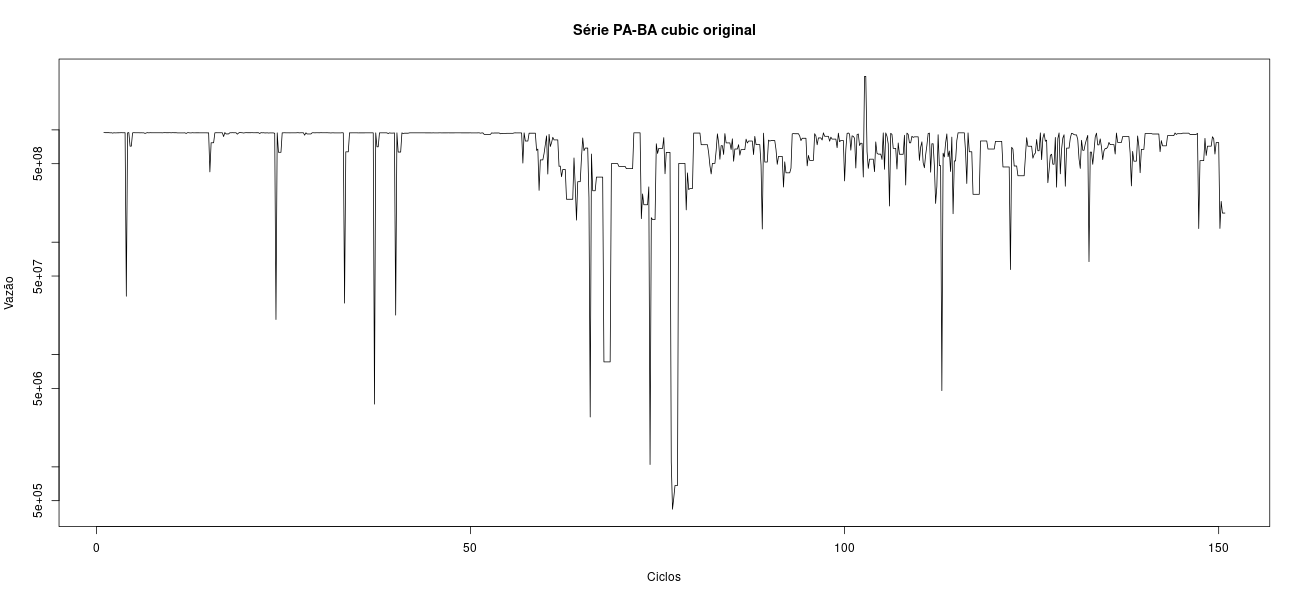

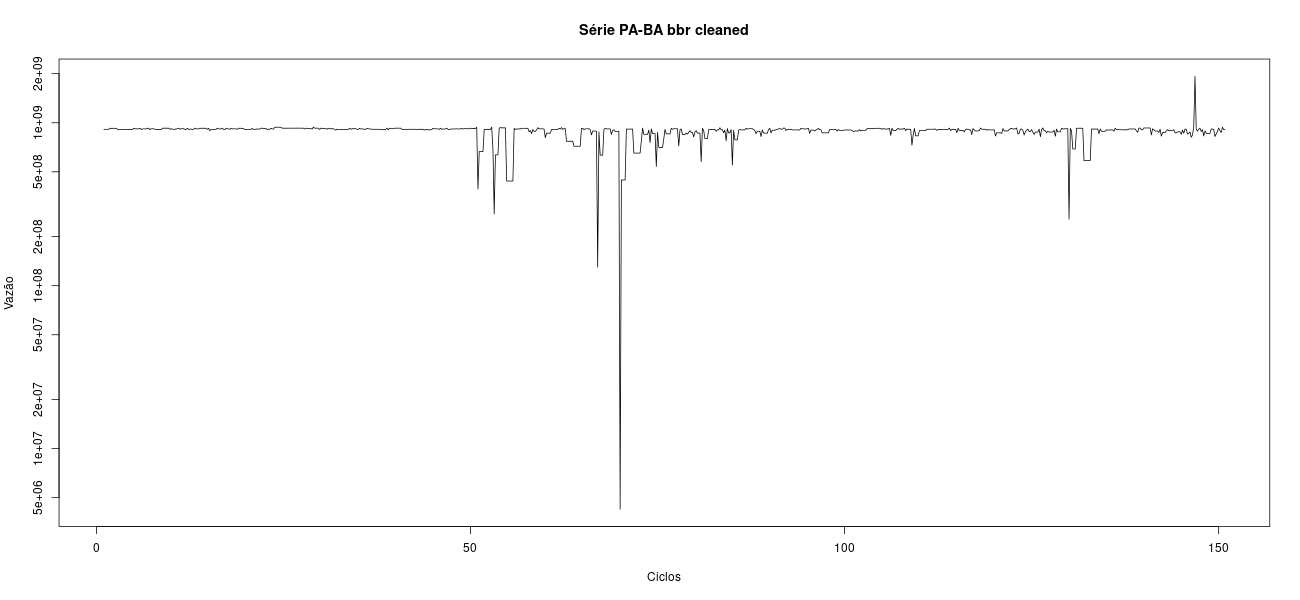

In [93]:
%%R -w 1300 -h 600

plot(Ts_Original_PA_BA_cubic, main="Série PA-BA cubic original", ylab="Vazão", xlab="Ciclos", log="y")
plot(Ts_Original_PA_BA_bbr, main="Série PA-BA bbr cleaned", ylab="Vazão", xlab="Ciclos", log="y")

### Gerando os gráficos de acertos

#### Séries Cleaned

##### BBR

In [94]:

series_test_cleaned_bbr = dict() # quantidade de observações de uma determinada faixa
series_cleaned_bbr = dict()
for finais in list(filter(lambda x: x.endswith("_bbr"), arquivos)):
    series = list(filter(lambda x: x.endswith(finais), lista_nomes_series_cleaned))
    series_teste = list(filter(lambda x: x.startswith("myts"), series))[0]
    faixa_teste = dict_series_faixas_cleaned[series_teste]
    series_test_cleaned_bbr.setdefault(series_teste, {"r": 0, "o": 0, "y": 0, "b": 0, "g": 0})
    for i in series_test_cleaned_bbr[series_teste].keys():
        series_test_cleaned_bbr[series_teste][i] = faixa_teste.count(i)
    series.remove(series_teste)
    for serie in series:
        faixa_prevista = dict_series_faixas_cleaned[serie]
        lista_aux = []
        series_cleaned_bbr.setdefault(serie, {"r": 0, "o": 0, "y": 0, "b": 0, "g": 0})
        #print(serie, series_teste)
        for i in range(len(dict_series_faixas_cleaned[series_teste])):
            if faixa_teste[i] == faixa_prevista[i]:
                series_cleaned_bbr[serie][faixa_teste[i]] += 1
                lista_aux.append(1)
            else:
                lista_aux.append(0)
        dict_series_acerto_erro_cleaned[serie] = lista_aux
        dict_numero_acertos_cleaned[serie] = lista_aux.count(1)

print(series_test_cleaned_bbr)
print(series_cleaned_bbr)

{'mytsTest106_Cleaned_CE_SP_bbr': {'r': 0, 'o': 0, 'y': 0, 'b': 239, 'g': 0}, 'mytsTest106_Cleaned_MG_RS_bbr': {'r': 0, 'o': 0, 'y': 0, 'b': 239, 'g': 0}, 'mytsTest106_Cleaned_PA_BA_bbr': {'r': 0, 'o': 2, 'y': 1, 'b': 17, 'g': 219}, 'mytsTest106_Cleaned_PR_AM_bbr': {'r': 0, 'o': 0, 'y': 0, 'b': 239, 'g': 0}}
{'Ts_Cleaned_pred_GRU_CE_SP_bbr': {'r': 0, 'o': 0, 'y': 0, 'b': 239, 'g': 0}, 'Ts_Cleaned_pred_LSTM_CE_SP_bbr': {'r': 0, 'o': 0, 'y': 0, 'b': 239, 'g': 0}, 'Ts_Cleaned_pred_NNETAR_CE_SP_bbr': {'r': 0, 'o': 0, 'y': 0, 'b': 239, 'g': 0}, 'Ts_Cleaned_pred_GRU_MG_RS_bbr': {'r': 0, 'o': 0, 'y': 0, 'b': 239, 'g': 0}, 'Ts_Cleaned_pred_LSTM_MG_RS_bbr': {'r': 0, 'o': 0, 'y': 0, 'b': 239, 'g': 0}, 'Ts_Cleaned_pred_NNETAR_MG_RS_bbr': {'r': 0, 'o': 0, 'y': 0, 'b': 239, 'g': 0}, 'Ts_Cleaned_pred_GRU_PA_BA_bbr': {'r': 0, 'o': 0, 'y': 0, 'b': 0, 'g': 219}, 'Ts_Cleaned_pred_LSTM_PA_BA_bbr': {'r': 0, 'o': 0, 'y': 0, 'b': 0, 'g': 219}, 'Ts_Cleaned_pred_NNETAR_PA_BA_bbr': {'r': 0, 'o': 0, 'y': 0, 'b'

##### CUBIC

In [95]:

series_test_cleaned_bbr = dict() # quantidade de observações de uma determinada faixa
series_cleaned_bbr = dict()
for finais in list(filter(lambda x: x.endswith("_cubic"), arquivos)):
    series = list(filter(lambda x: x.endswith(finais), lista_nomes_series_cleaned))
    series_teste = list(filter(lambda x: x.startswith("myts"), series))[0]
    faixa_teste = dict_series_faixas_cleaned[series_teste]
    series_test_cleaned_bbr.setdefault(series_teste, {"r": 0, "o": 0, "y": 0, "b": 0, "g": 0})
    for i in series_test_cleaned_bbr[series_teste].keys():
        series_test_cleaned_bbr[series_teste][i] = faixa_teste.count(i)
    series.remove(series_teste)
    for serie in series:
        faixa_prevista = dict_series_faixas_cleaned[serie]
        lista_aux = []
        series_cleaned_bbr.setdefault(serie, {"r": 0, "o": 0, "y": 0, "b": 0, "g": 0})
        #print(serie, series_teste)
        for i in range(len(dict_series_faixas_cleaned[series_teste])):
            if faixa_teste[i] == faixa_prevista[i]:
                series_cleaned_bbr[serie][faixa_teste[i]] += 1
                lista_aux.append(1)
            else:
                lista_aux.append(0)
        dict_series_acerto_erro_cleaned[serie] = lista_aux
        dict_numero_acertos_cleaned[serie] = lista_aux.count(1)

print(series_test_cleaned_bbr)
print(series_cleaned_bbr)

{'mytsTest106_Cleaned_CE_SP_cubic': {'r': 0, 'o': 0, 'y': 0, 'b': 239, 'g': 0}, 'mytsTest106_Cleaned_MG_RS_cubic': {'r': 0, 'o': 5, 'y': 231, 'b': 3, 'g': 0}, 'mytsTest106_Cleaned_PA_BA_cubic': {'r': 12, 'o': 2, 'y': 13, 'b': 15, 'g': 197}, 'mytsTest106_Cleaned_PR_AM_cubic': {'r': 0, 'o': 6, 'y': 230, 'b': 3, 'g': 0}}
{'Ts_Cleaned_pred_GRU_CE_SP_cubic': {'r': 0, 'o': 0, 'y': 0, 'b': 239, 'g': 0}, 'Ts_Cleaned_pred_LSTM_CE_SP_cubic': {'r': 0, 'o': 0, 'y': 0, 'b': 239, 'g': 0}, 'Ts_Cleaned_pred_NNETAR_CE_SP_cubic': {'r': 0, 'o': 0, 'y': 0, 'b': 239, 'g': 0}, 'Ts_Cleaned_pred_GRU_MG_RS_cubic': {'r': 0, 'o': 0, 'y': 230, 'b': 0, 'g': 0}, 'Ts_Cleaned_pred_LSTM_MG_RS_cubic': {'r': 0, 'o': 0, 'y': 230, 'b': 0, 'g': 0}, 'Ts_Cleaned_pred_NNETAR_MG_RS_cubic': {'r': 0, 'o': 0, 'y': 231, 'b': 0, 'g': 0}, 'Ts_Cleaned_pred_GRU_PA_BA_cubic': {'r': 0, 'o': 0, 'y': 0, 'b': 2, 'g': 193}, 'Ts_Cleaned_pred_LSTM_PA_BA_cubic': {'r': 0, 'o': 0, 'y': 1, 'b': 1, 'g': 195}, 'Ts_Cleaned_pred_NNETAR_PA_BA_cubic': 

#### Séries Original

##### BBR

In [96]:

series_test_original_bbr = dict() # quantidade de observações de uma determinada faixa
series_original_bbr = dict()
for finais in list(filter(lambda x: x.endswith("_bbr"), arquivos)):
    series = list(filter(lambda x: x.endswith(finais), lista_nomes_series_original))
    series_teste = list(filter(lambda x: x.startswith("myts"), series))[0]
    faixa_teste = dict_series_faixas_original[series_teste]
    series_test_original_bbr.setdefault(series_teste, {"r": 0, "o": 0, "y": 0, "b": 0, "g": 0})
    for i in series_test_original_bbr[series_teste].keys():
        series_test_original_bbr[series_teste][i] = faixa_teste.count(i)
    series.remove(series_teste)
    for serie in series:
        faixa_prevista = dict_series_faixas_original[serie]
        lista_aux = []
        series_original_bbr.setdefault(serie, {"r": 0, "o": 0, "y": 0, "b": 0, "g": 0})
        #print(serie, series_teste)
        for i in range(len(dict_series_faixas_original[series_teste])):
            if faixa_teste[i] == faixa_prevista[i]:
                series_original_bbr[serie][faixa_teste[i]] += 1
                lista_aux.append(1)
            else:
                lista_aux.append(0)
        dict_series_acerto_erro_original[serie] = lista_aux
        dict_numero_acertos_original[serie] = lista_aux.count(1)

print(series_test_original_bbr)
print(series_original_bbr)

{'mytsTest106_Original_CE_SP_bbr': {'r': 0, 'o': 0, 'y': 6, 'b': 232, 'g': 1}, 'mytsTest106_Original_MG_RS_bbr': {'r': 0, 'o': 2, 'y': 1, 'b': 17, 'g': 219}, 'mytsTest106_Original_PA_BA_bbr': {'r': 0, 'o': 1, 'y': 10, 'b': 228, 'g': 0}, 'mytsTest106_Original_PR_AM_bbr': {'r': 0, 'o': 2, 'y': 3, 'b': 223, 'g': 11}}
{'Ts_Original_pred_NNETAR_CE_SP_bbr': {'r': 0, 'o': 0, 'y': 0, 'b': 232, 'g': 0}, 'Ts_Original_pred_GRU_CE_SP_bbr': {'r': 0, 'o': 0, 'y': 0, 'b': 230, 'g': 0}, 'Ts_Original_pred_LSTM_CE_SP_bbr': {'r': 0, 'o': 0, 'y': 0, 'b': 230, 'g': 0}, 'Ts_Original_pred_NNETAR_MG_RS_bbr': {'r': 0, 'o': 0, 'y': 0, 'b': 0, 'g': 219}, 'Ts_Original_pred_GRU_MG_RS_bbr': {'r': 0, 'o': 0, 'y': 0, 'b': 0, 'g': 219}, 'Ts_Original_pred_LSTM_MG_RS_bbr': {'r': 0, 'o': 0, 'y': 0, 'b': 0, 'g': 218}, 'Ts_Original_pred_NNETAR_PA_BA_bbr': {'r': 0, 'o': 0, 'y': 0, 'b': 228, 'g': 0}, 'Ts_Original_pred_GRU_PA_BA_bbr': {'r': 0, 'o': 0, 'y': 0, 'b': 155, 'g': 0}, 'Ts_Original_pred_LSTM_PA_BA_bbr': {'r': 0, 'o':

##### CUBIC

In [97]:

series_test_original_bbr = dict() # quantidade de observações de uma determinada faixa
series_original_bbr = dict()
for finais in list(filter(lambda x: x.endswith("_cubic"), arquivos)):
    series = list(filter(lambda x: x.endswith(finais), lista_nomes_series_original))
    series_teste = list(filter(lambda x: x.startswith("myts"), series))[0]
    faixa_teste = dict_series_faixas_original[series_teste]
    series_test_original_bbr.setdefault(series_teste, {"r": 0, "o": 0, "y": 0, "b": 0, "g": 0})
    for i in series_test_original_bbr[series_teste].keys():
        series_test_original_bbr[series_teste][i] = faixa_teste.count(i)
    series.remove(series_teste)
    for serie in series:
        faixa_prevista = dict_series_faixas_original[serie]
        lista_aux = []
        series_original_bbr.setdefault(serie, {"r": 0, "o": 0, "y": 0, "b": 0, "g": 0})
        #print(serie, series_teste)
        for i in range(len(dict_series_faixas_original[series_teste])):
            if faixa_teste[i] == faixa_prevista[i]:
                series_original_bbr[serie][faixa_teste[i]] += 1
                lista_aux.append(1)
            else:
                lista_aux.append(0)
        dict_series_acerto_erro_original[serie] = lista_aux
        dict_numero_acertos_original[serie] = lista_aux.count(1)

print(series_test_original_bbr)
print(series_original_bbr)

{'mytsTest106_Original_CE_SP_cubic': {'r': 2, 'o': 0, 'y': 4, 'b': 233, 'g': 0}, 'mytsTest106_Original_MG_RS_cubic': {'r': 12, 'o': 2, 'y': 13, 'b': 15, 'g': 197}, 'mytsTest106_Original_PA_BA_cubic': {'r': 4, 'o': 43, 'y': 106, 'b': 86, 'g': 0}, 'mytsTest106_Original_PR_AM_cubic': {'r': 5, 'o': 15, 'y': 210, 'b': 3, 'g': 6}}
{'Ts_Original_pred_NNETAR_CE_SP_cubic': {'r': 0, 'o': 0, 'y': 0, 'b': 17, 'g': 0}, 'Ts_Original_pred_GRU_CE_SP_cubic': {'r': 0, 'o': 0, 'y': 0, 'b': 230, 'g': 0}, 'Ts_Original_pred_LSTM_CE_SP_cubic': {'r': 0, 'o': 0, 'y': 0, 'b': 233, 'g': 0}, 'Ts_Original_pred_NNETAR_MG_RS_cubic': {'r': 0, 'o': 0, 'y': 0, 'b': 0, 'g': 170}, 'Ts_Original_pred_GRU_MG_RS_cubic': {'r': 0, 'o': 0, 'y': 0, 'b': 1, 'g': 181}, 'Ts_Original_pred_LSTM_MG_RS_cubic': {'r': 0, 'o': 0, 'y': 0, 'b': 1, 'g': 175}, 'Ts_Original_pred_NNETAR_PA_BA_cubic': {'r': 0, 'o': 0, 'y': 35, 'b': 36, 'g': 0}, 'Ts_Original_pred_GRU_PA_BA_cubic': {'r': 0, 'o': 4, 'y': 74, 'b': 16, 'g': 0}, 'Ts_Original_pred_LSTM